# Data Visualization | Homework 4 | David Aslanyan

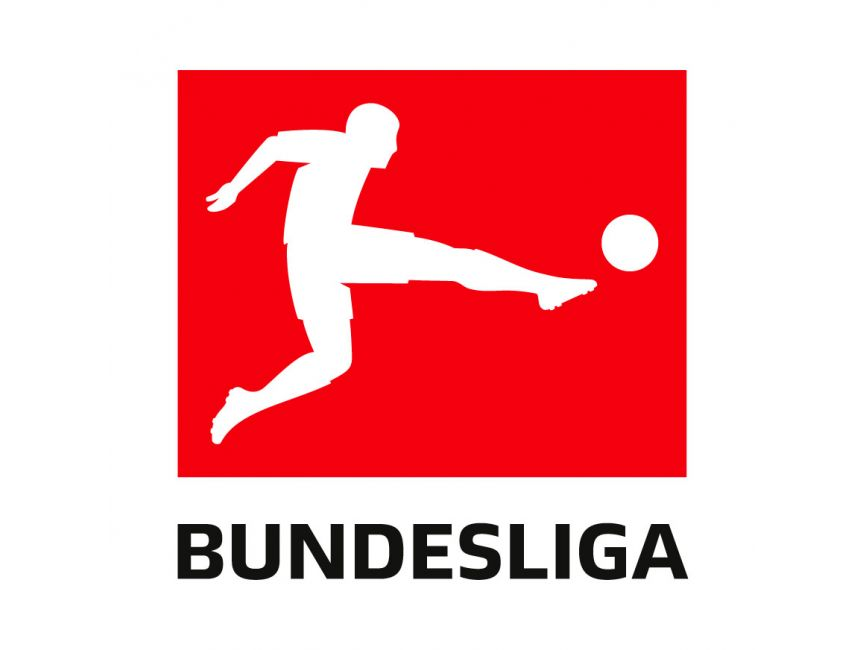

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np

## Part 1 | Trend Analysis

In [17]:
bundesliga_df = pd.read_csv('bundesliga.csv')

bundesliga_df['TOTAL_GOALS'] = bundesliga_df['FTHG'] + bundesliga_df['FTAG']

bundesliga_df['MATCH_PAIR'] = bundesliga_df['HOMETEAM'] + '-' + bundesliga_df['AWAYTEAM']

season_stats = bundesliga_df.groupby('SEASON').agg(
    total_goals=('TOTAL_GOALS', 'sum'),
    total_matches=('MATCH_PAIR', 'nunique')  
)

season_stats['average_goals_per_match'] = season_stats['total_goals'] / season_stats['total_matches']

print(season_stats)

        total_goals  total_matches  average_goals_per_match
SEASON                                                     
1994            895            306                 2.924837
1995            918            306                 3.000000
1996            831            306                 2.715686
1997            911            306                 2.977124
1998            883            306                 2.885621
1999            866            306                 2.830065
2000            885            306                 2.892157
2001            897            306                 2.931373
2002            893            306                 2.918301
2003            821            306                 2.683007
2004            909            306                 2.970588
2005            890            306                 2.908497
2006            861            306                 2.813725
2007            837            306                 2.735294
2008            860            306      

## Part 1.1 Total Goals / Average Goals Per Match

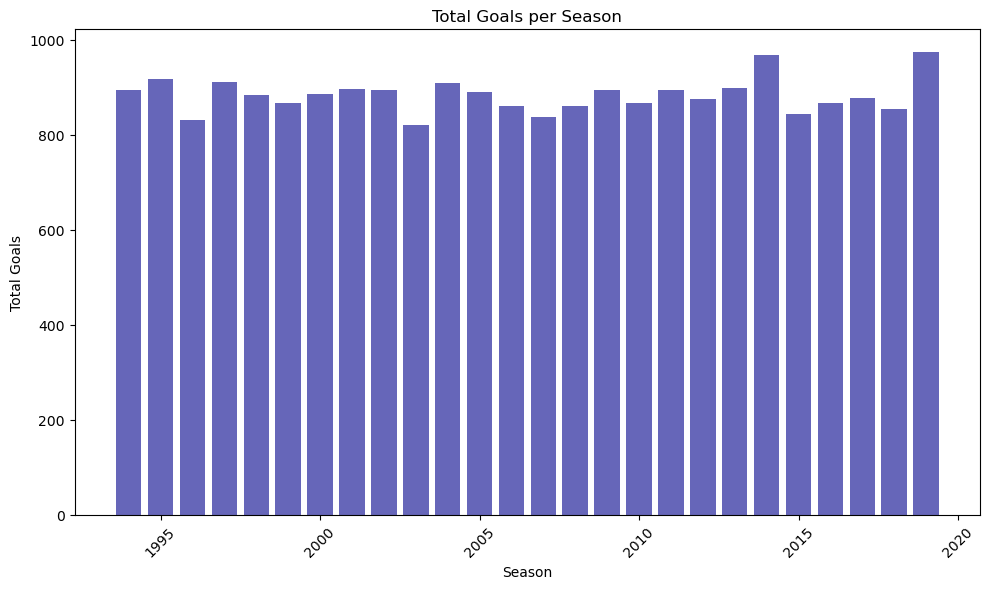

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(season_stats.index, season_stats['total_goals'], alpha=0.6, label='Total Goals', color='darkblue')
ax1.set_xlabel('Season')
ax1.set_ylabel('Total Goals')
ax1.set_title('Total Goals per Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

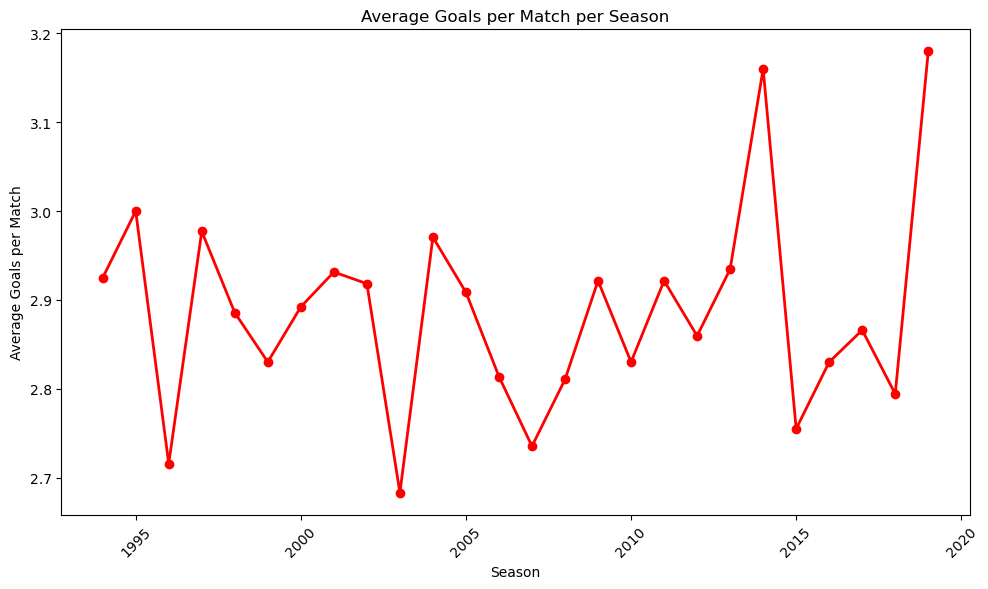

In [19]:
fig, ax2 = plt.subplots(figsize=(10, 6))
ax2.plot(season_stats.index, season_stats['average_goals_per_match'], color='red', marker='o', label='Average Goals per Match', linestyle='-', linewidth=2)
ax2.set_xlabel('Season')
ax2.set_ylabel('Average Goals per Match')
ax2.set_title('Average Goals per Match per Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Part 1.2 Goal Distribution Per Season

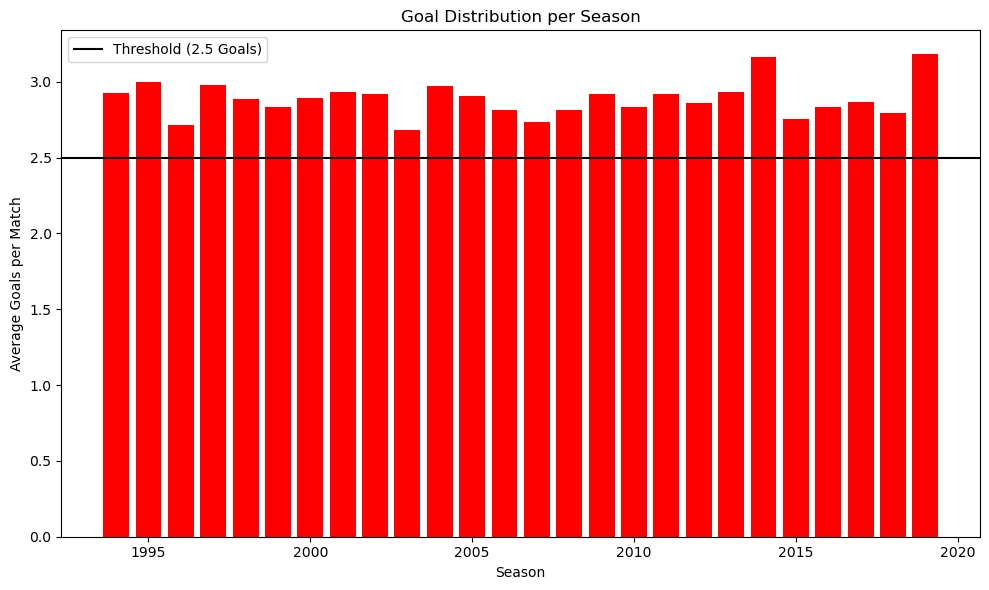

In [20]:
bundesliga_df = pd.read_csv('bundesliga.csv')

bundesliga_df['TOTAL_GOALS'] = bundesliga_df['FTHG'] + bundesliga_df['FTAG']

bundesliga_df['MATCH_PAIR'] = bundesliga_df['HOMETEAM'] + '-' + bundesliga_df['AWAYTEAM']

season_stats = bundesliga_df.groupby('SEASON').agg(
    total_goals=('TOTAL_GOALS', 'sum'),
    total_matches=('MATCH_PAIR', 'nunique')
)

season_stats['average_goals_per_match'] = season_stats['total_goals'] / season_stats['total_matches']

season_stats['goal_threshold'] = season_stats['average_goals_per_match'].apply(lambda x: 'Above 2.5' if x > 2.5 else 'Below 2.5')

plt.figure(figsize=(10, 6))
plt.bar(season_stats.index, season_stats['average_goals_per_match'], 
        color=season_stats['goal_threshold'].map({'Above 2.5': 'red', 'Below 2.5': 'red'}))

plt.xlabel('Season')
plt.ylabel('Average Goals per Match')
plt.title('Goal Distribution per Season')

plt.axhline(y=2.5, color='black', linestyle='-', label='Threshold (2.5 Goals)')
plt.legend()

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Part 1.3 Line Charts

In [21]:
bundesliga_df = pd.read_csv('bundesliga.csv')

seasons = bundesliga_df['SEASON'].unique()

team_colors = {
    'Bayern Munich': 'red',
    'Dortmund': 'yellow',
    'Werder Bremen': 'darkgreen',
    'Schalke': 'blue',
    'Wolfsburg': 'lightgreen'
}

output_pdf = 'goal_trends_per_season_colored_readable.pdf'

with PdfPages(output_pdf) as pdf:
    for season in seasons:
        season_data = bundesliga_df[bundesliga_df['SEASON'] == season]
        
        team_goals_home = season_data.groupby('HOMETEAM').agg(total_goals=('FTHG', 'sum')).reset_index()
        team_goals_away = season_data.groupby('AWAYTEAM').agg(total_goals=('FTAG', 'sum')).reset_index()

        total_goals = pd.concat([team_goals_home, team_goals_away.rename(columns={'AWAYTEAM': 'HOMETEAM'})], ignore_index=True)
        total_goals = total_goals.groupby('HOMETEAM').agg(total_goals=('total_goals', 'sum')).reset_index()

        if 'Bayern Munich' not in total_goals['HOMETEAM'].values:
            bayern_goals_home = season_data[season_data['HOMETEAM'] == 'Bayern Munich'].agg(total_goals=('FTHG', 'sum')).reset_index()
            bayern_goals_away = season_data[season_data['AWAYTEAM'] == 'Bayern Munich'].agg(total_goals=('FTAG', 'sum')).reset_index()
            bayern_goals = pd.concat([bayern_goals_home, bayern_goals_away], ignore_index=True)
            bayern_total_goals = bayern_goals['total_goals'].sum()
            total_goals = total_goals.append({'HOMETEAM': 'Bayern Munich', 'total_goals': bayern_total_goals}, ignore_index=True)

        plt.figure(figsize=(12, 8))

        for team in total_goals['HOMETEAM']:
            team_data = total_goals[total_goals['HOMETEAM'] == team]
            color = team_colors.get(team, 'gray') 
            plt.plot([season], [team_data['total_goals'].values[0]], color=color, marker='o', markersize=8, label=team if team == 'Bayern Munich' else "", linewidth=2)

        plt.grid(True, linestyle='--', alpha=0.6)

        total_goals_bayern = total_goals[total_goals['HOMETEAM'] == 'Bayern Munich']['total_goals'].values[0]
        plt.title(f"Goals Trend in Season {season} - Total Goals: {total_goals['total_goals'].sum()}", fontsize=16, fontweight='bold')
        plt.text(0.5, 0.1, f"Bayern Munich Goals: {total_goals_bayern}", ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='light')

        plt.xlabel('Season', fontsize=14)
        plt.ylabel('Total Goals', fontsize=14)
        
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)

        plt.legend(loc='upper left', fontsize=12, frameon=True)

        pdf.savefig()
        plt.close()

output_pdf

'goal_trends_per_season_colored_readable.pdf'

## Part 2 | Home Advantage Deconstructed

## Part 2.1 Heatmaps for Home and Away Wins

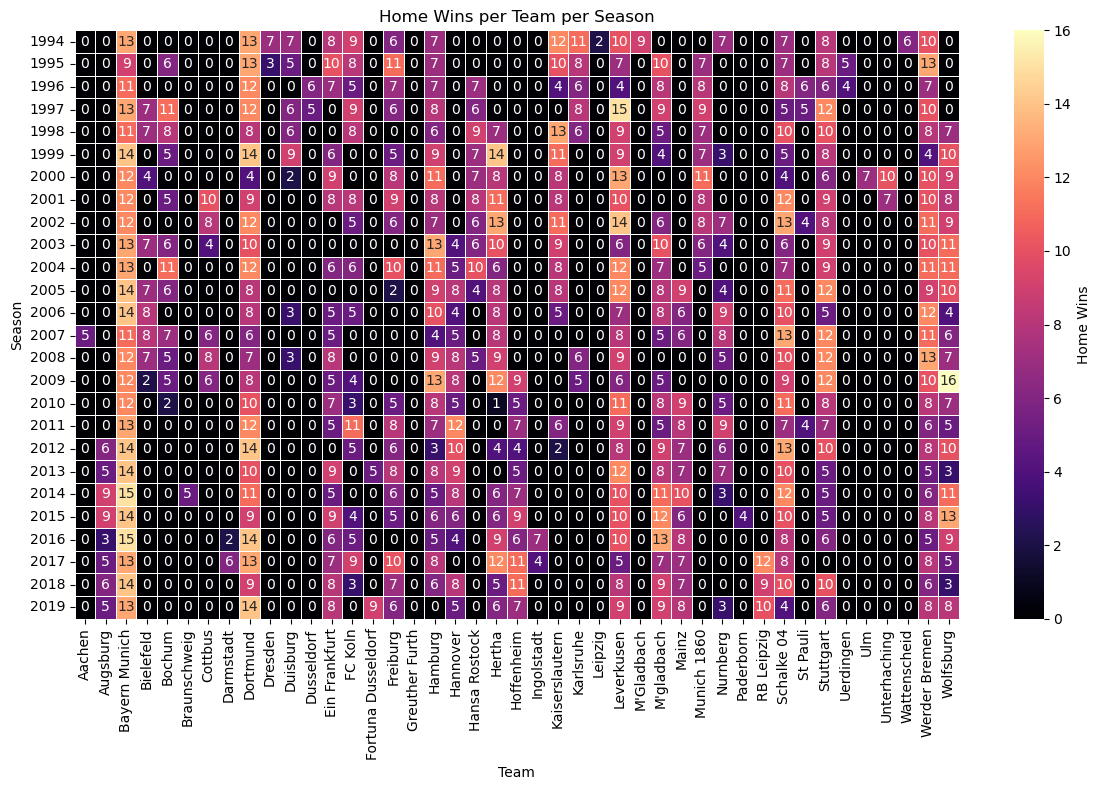

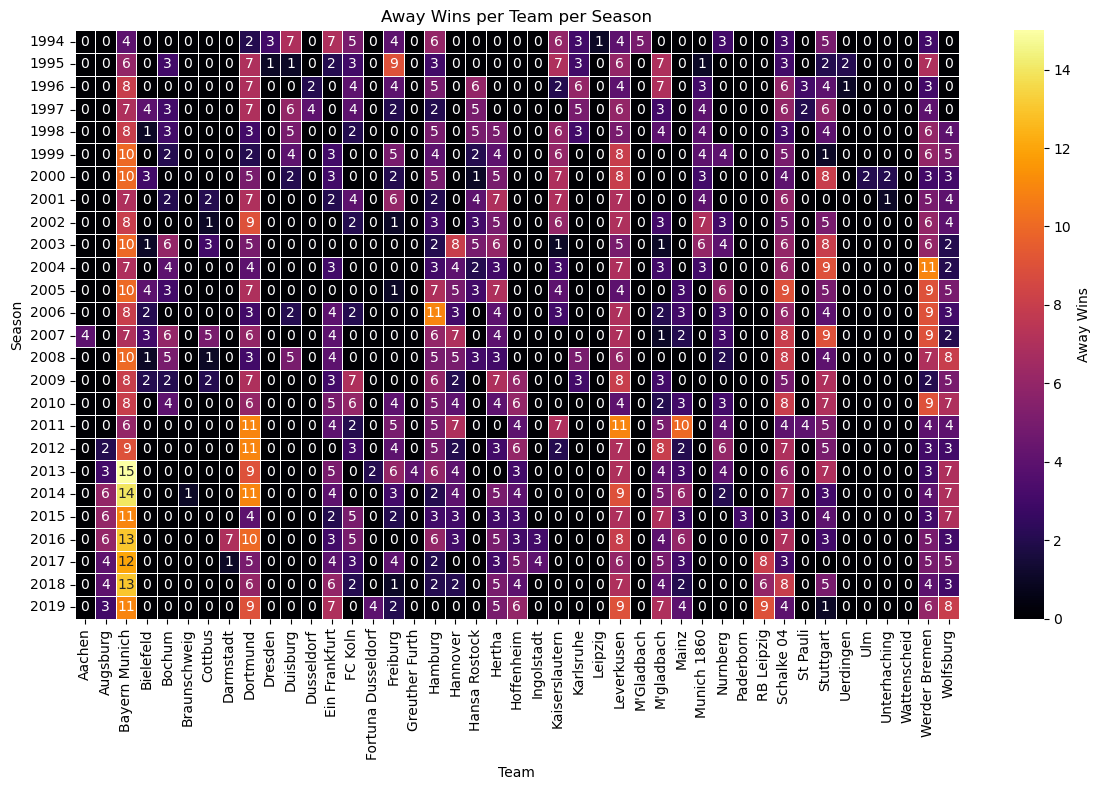

In [22]:
bundesliga_df = pd.read_csv('bundesliga.csv')

bundesliga_df['HOME_WIN'] = (bundesliga_df['FTHG'] > bundesliga_df['FTAG']).astype(int)
bundesliga_df['AWAY_WIN'] = (bundesliga_df['FTHG'] < bundesliga_df['FTAG']).astype(int)

home_wins = bundesliga_df.groupby(['SEASON', 'HOMETEAM'])['HOME_WIN'].sum().unstack(fill_value=0)
away_wins = bundesliga_df.groupby(['SEASON', 'AWAYTEAM'])['AWAY_WIN'].sum().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(home_wins, annot=True, fmt="d", cmap="magma", cbar_kws={'label': 'Home Wins'}, linewidths=0.5)
plt.title('Home Wins per Team per Season')
plt.xlabel('Team')
plt.ylabel('Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(away_wins, annot=True, fmt="d", cmap="inferno", cbar_kws={'label': 'Away Wins'}, linewidths=0.5)
plt.title('Away Wins per Team per Season')
plt.xlabel('Team')
plt.ylabel('Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Part 2.2 Visualization for Wins Difference

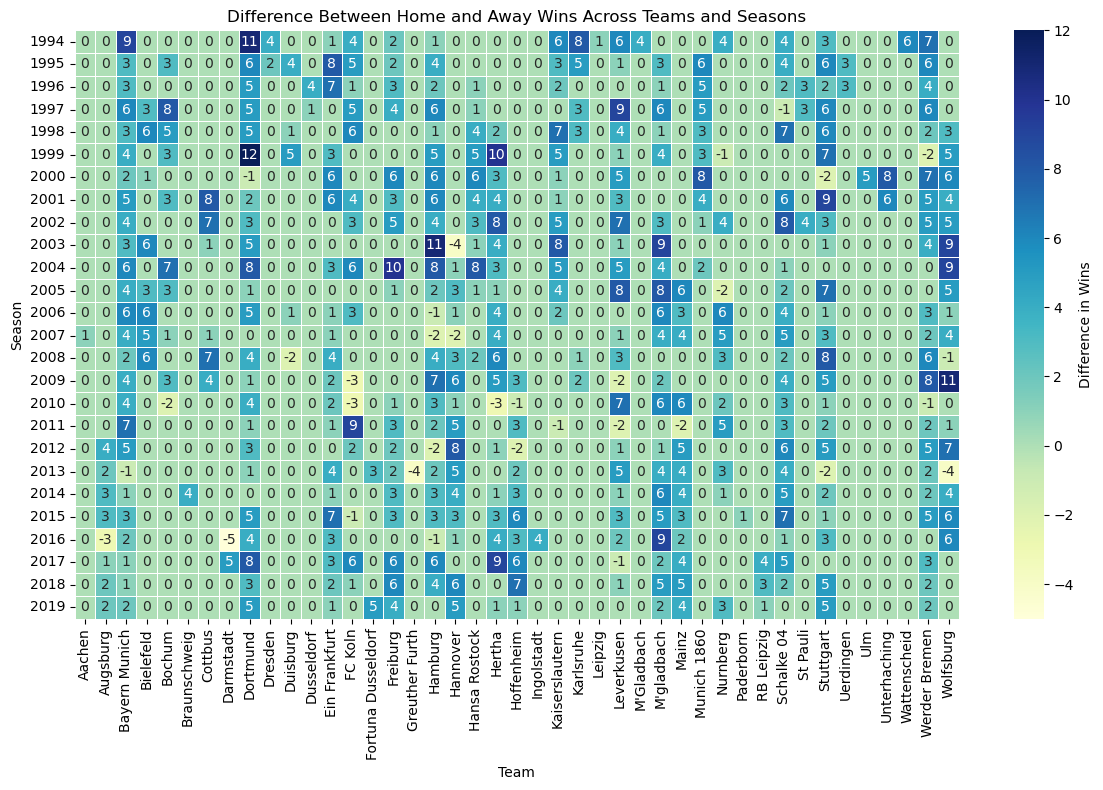

/var/folders/cz/ysxc02l92kv04yfdk1rqmzx80000gn/T/ipykernel_73647/972881905.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1600x1200 with 0 Axes>

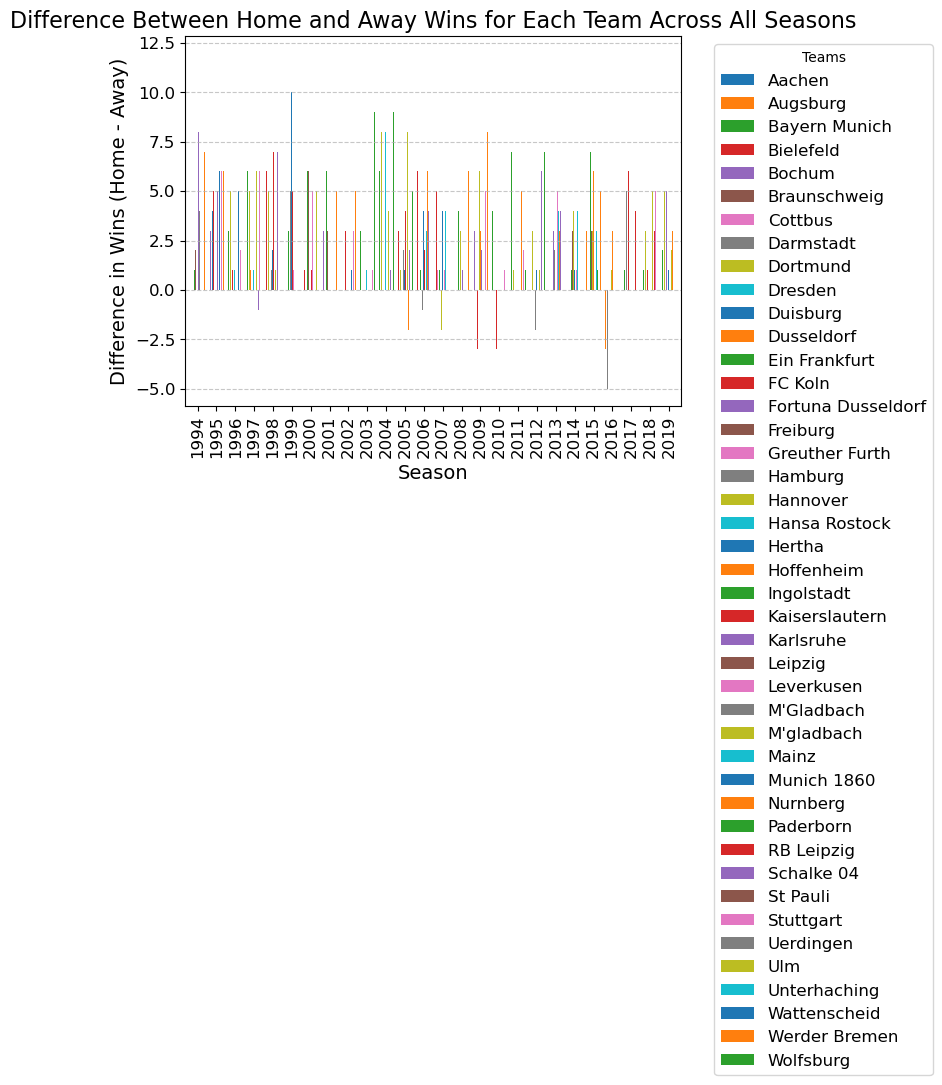

In [23]:
merged_wins = home_wins.subtract(away_wins, fill_value=0)

merged_wins['Difference'] = merged_wins.sum(axis=1)

plt.figure(figsize=(12, 8))
sns.heatmap(merged_wins.drop('Difference', axis=1), annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Difference in Wins'}, linewidths=0.5)
plt.title('Difference Between Home and Away Wins Across Teams and Seasons')
plt.xlabel('Team')
plt.ylabel('Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 12))
merged_wins.drop('Difference', axis=1).plot(kind='bar', stacked=False, width=0.8)
plt.title('Difference Between Home and Away Wins for Each Team Across All Seasons', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Difference in Wins (Home - Away)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()


## Part 3 

## Part 3.1 Team Trajectories and Volatility

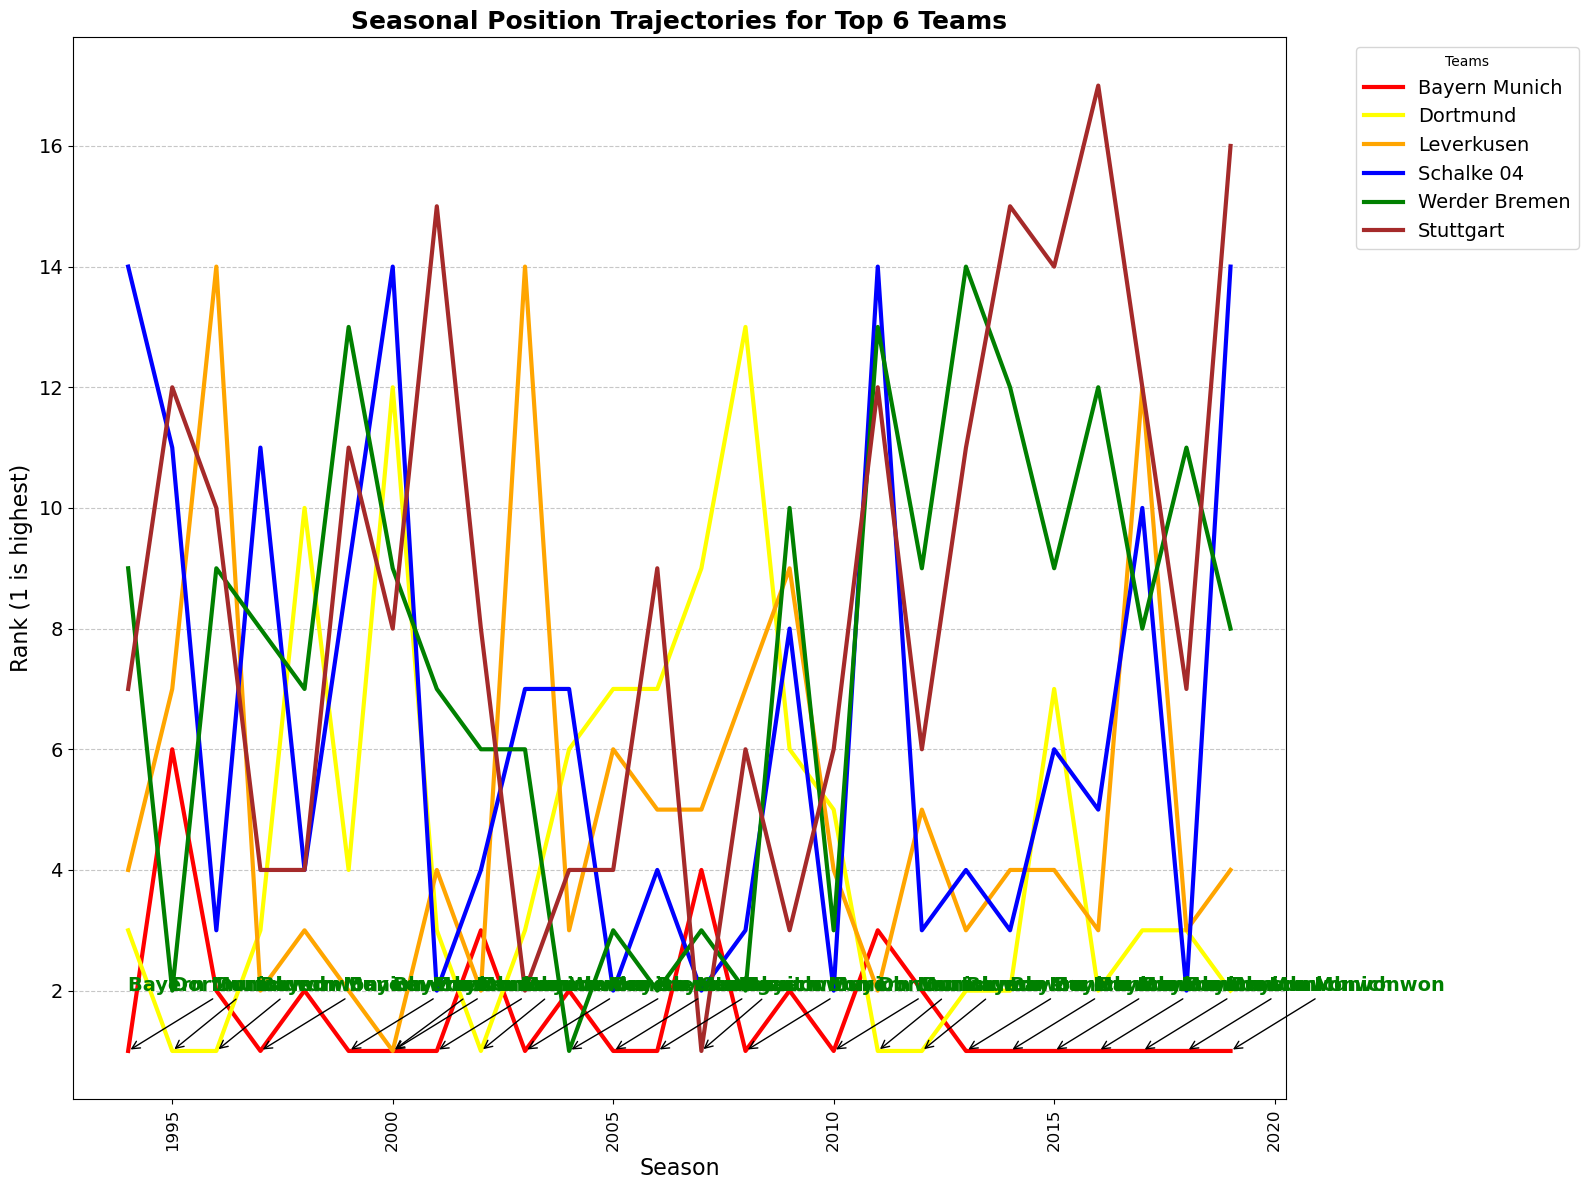

In [24]:
bundesliga_df['HOME_POINTS'] = (bundesliga_df['FTHG'] > bundesliga_df['FTAG']) * 3 + (bundesliga_df['FTHG'] == bundesliga_df['FTAG']) * 1
bundesliga_df['AWAY_POINTS'] = (bundesliga_df['FTHG'] < bundesliga_df['FTAG']) * 3 + (bundesliga_df['FTHG'] == bundesliga_df['FTAG']) * 1

season_points = bundesliga_df.groupby(['SEASON', 'HOMETEAM'])['HOME_POINTS'].sum() + bundesliga_df.groupby(['SEASON', 'AWAYTEAM'])['AWAY_POINTS'].sum()

season_points_df = season_points.reset_index(name='Total_Points')

season_points_df['Rank'] = season_points_df.groupby('SEASON')['Total_Points'].rank(method='min', ascending=False)

top_teams = season_points_df.groupby('HOMETEAM')['Total_Points'].sum().nlargest(6).index

top_teams_season = season_points_df[season_points_df['HOMETEAM'].isin(top_teams)]

team_colors = {
    'Bayern Munich': 'red',
    'Dortmund': 'yellow',
    'Leverkusen': 'orange',
    'Schalke 04': 'blue',
    'Werder Bremen': 'green',
    'Stuttgart': 'brown'
}

plt.figure(figsize=(16, 12))

for team in top_teams:
    team_data = top_teams_season[top_teams_season['HOMETEAM'] == team]
    color = team_colors.get(team, 'gray') 
    plt.plot(team_data['SEASON'], team_data['Rank'], label=team, color=color, linewidth=3)

for team in top_teams:
    team_data = top_teams_season[top_teams_season['HOMETEAM'] == team]
    title_winning_seasons = team_data[team_data['Rank'] == 1]['SEASON']
    for season in title_winning_seasons:
        plt.annotate(f'{team} won', xy=(season, 1), xytext=(season, 2),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=14, color='green', fontweight='bold')

plt.title('Seasonal Position Trajectories for Top 6 Teams', fontsize=18, fontweight='bold')
plt.xlabel('Season', fontsize=16)
plt.ylabel('Rank (1 is highest)', fontsize=16)
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()


## Part 3.2 Volatility Index

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


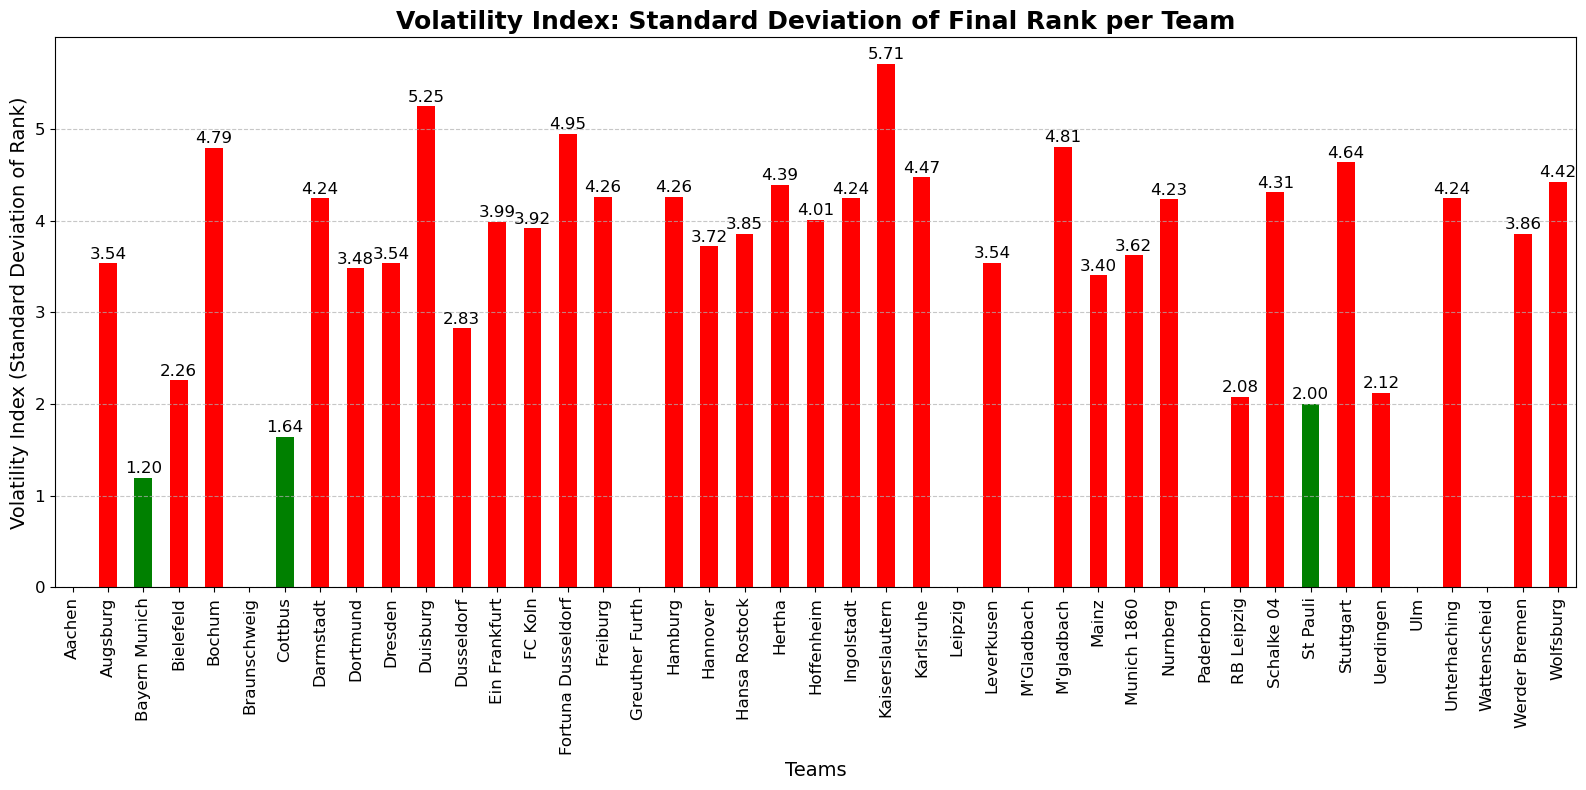

In [25]:
season_points = bundesliga_df.groupby(['SEASON', 'HOMETEAM'])['HOME_POINTS'].sum() + bundesliga_df.groupby(['SEASON', 'AWAYTEAM'])['AWAY_POINTS'].sum()

season_points_df = season_points.reset_index(name='Total_Points')

season_points_df['Rank'] = season_points_df.groupby('SEASON')['Total_Points'].rank(method='min', ascending=False)

volatility_index = season_points_df.groupby('HOMETEAM')['Rank'].std()

plt.figure(figsize=(14, 8))

colors = volatility_index.apply(lambda x: 'green' if x <= 2 else 'red')

volatility_index.plot(kind='bar', color=colors, figsize=(16, 8))

for i, value in enumerate(volatility_index):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', fontsize=12, color='black')

plt.title('Volatility Index: Standard Deviation of Final Rank per Team', fontsize=18, fontweight='bold')
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Volatility Index (Standard Deviation of Rank)', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### If the volatility index is less than 2, the team's bar will show green, meaning that they are the most succesfull clubs in the league from 1994 to 2019 

## Part 4 | Rivarlies and Big Match Patterns

## Part 4.1

In [ ]:
rivalries = [
    ('Bayern Munich', 'Dortmund'),
    ('Schalke 04', 'Dortmund'),
    ('Bayern Munich', 'Leverkusen'),
    ('Werder Bremen', 'Hamburg'),
    ('Bayern Munich', 'Wolfsburg')
]

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

for idx, (team1, team2) in enumerate(rivalries):
    ax = axes[idx // 2, idx % 2]
    
    rivalry_df = bundesliga_df[
        ((bundesliga_df['HOMETEAM'] == team1) & (bundesliga_df['AWAYTEAM'] == team2)) | 
        ((bundesliga_df['HOMETEAM'] == team2) & (bundesliga_df['AWAYTEAM'] == team1))
    ]
    
    rivalry_df['result'] = rivalry_df.apply(lambda row: 'Home Win' if row['FTHG'] > row['FTAG'] 
                                             else ('Away Win' if row['FTHG'] < row['FTAG'] else 'Draw'), axis=1)

    result_counts = rivalry_df['result'].value_counts()

    sns.barplot(x=result_counts.index, y=result_counts.values, ax=ax)
    ax.set_title(f'{team1} vs {team2}')
    ax.set_ylabel('Number of Matches')
    ax.set_xlabel('Result')

    rivalry_df['goal_diff'] = abs(rivalry_df['FTHG'] - rivalry_df['FTAG'])
    max_win = rivalry_df.loc[rivalry_df['goal_diff'].idxmax()]
    ax.annotate(f'Max Win Margin: {max_win["goal_diff"]} goals',
                xy=(0.5, 0.8), xycoords='axes fraction',
                ha='center', fontsize=12, color='red', fontweight='bold')

plt.tight_layout()
plt.show()


## Part 4.2

/var/folders/cz/ysxc02l92kv04yfdk1rqmzx80000gn/T/ipykernel_73647/1449383916.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upsets_df['rank_diff'] = abs(upsets_df['FTHG'] - upsets_df['FTAG'])  # x-axis
/var/folders/cz/ysxc02l92kv04yfdk1rqmzx80000gn/T/ipykernel_73647/1449383916.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  upsets_df['goal_diff'] = upsets_df['FTHG'] - upsets_df['FTAG']  # y-axis


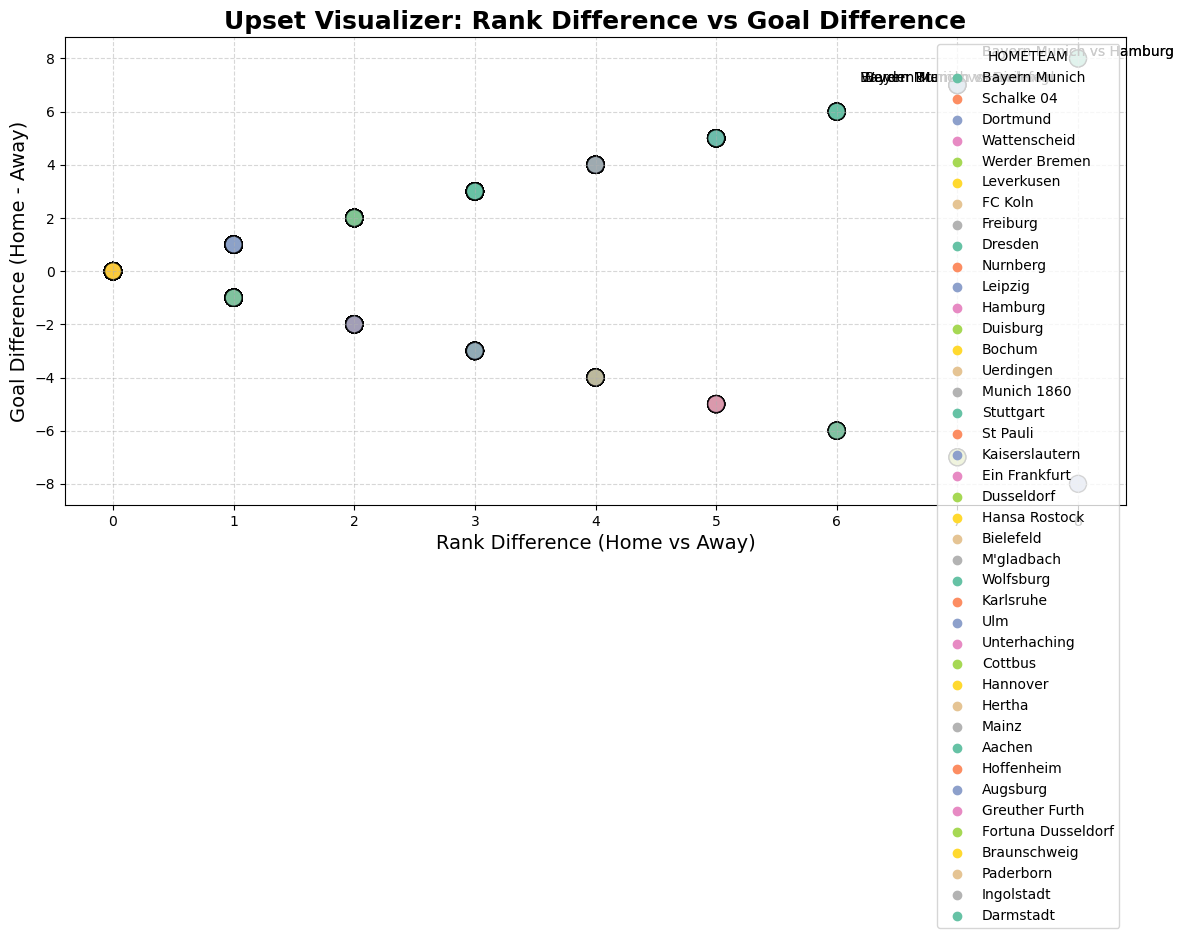

In [30]:
season_points = bundesliga_df.groupby(['SEASON', 'HOMETEAM'])['HOME_POINTS'].sum() + bundesliga_df.groupby(['SEASON', 'AWAYTEAM'])['AWAY_POINTS'].sum()
season_points_df = season_points.reset_index(name='Total_Points')

season_points_df['Rank'] = season_points_df.groupby('SEASON')['Total_Points'].rank(method='min', ascending=False)

top_5_teams = season_points_df.groupby('HOMETEAM')['Total_Points'].sum().nlargest(5).index

def is_upset(row):
    home_team_rank = season_points_df[(season_points_df['HOMETEAM'] == row['HOMETEAM']) & (season_points_df['SEASON'] == row['SEASON'])]['Rank'].values[0]
    away_team_rank = season_points_df[(season_points_df['HOMETEAM'] == row['AWAYTEAM']) & (season_points_df['SEASON'] == row['SEASON'])]['Rank'].values[0]
    
    home_is_top5 = row['HOMETEAM'] in top_5_teams
    away_is_top5 = row['AWAYTEAM'] in top_5_teams

    if (home_is_top5 and away_team_rank > home_team_rank + 8) or (away_is_top5 and home_team_rank > away_team_rank + 8):
        return True
    return False

bundesliga_df['upset'] = bundesliga_df.apply(is_upset, axis=1)

upsets_df = bundesliga_df[bundesliga_df['upset'] == True]

if upsets_df.empty:
    print("No upsets in the dataset.")
else:
    plt.figure(figsize=(12, 8))

    upsets_df['rank_diff'] = abs(upsets_df['FTHG'] - upsets_df['FTAG'])  # x-axis
    upsets_df['goal_diff'] = upsets_df['FTHG'] - upsets_df['FTAG']  # y-axis

    sns.set_palette("Set2")

    sns.scatterplot(
        x=upsets_df['rank_diff'], 
        y=upsets_df['goal_diff'], 
        hue=upsets_df['HOMETEAM'], 
        palette='Set2', 
        s=150, 
        edgecolor='black', 
        alpha=0.8, 
        marker='o'
    )

    largest_upsets = upsets_df.nlargest(5, 'goal_diff') 
    for i, row in largest_upsets.iterrows():
        plt.text(
            row['rank_diff'], row['goal_diff'], 
            f'{row["HOMETEAM"]} vs {row["AWAYTEAM"]}', 
            fontsize=10, 
            color='black', 
            ha='center', 
            va='bottom'
        )

    plt.title('Upset Visualizer: Rank Difference vs Goal Difference', fontsize=18, fontweight='bold')
    plt.xlabel('Rank Difference (Home vs Away)', fontsize=14)
    plt.ylabel('Goal Difference (Home - Away)', fontsize=14)

    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()

    plt.show()

## Part 5 

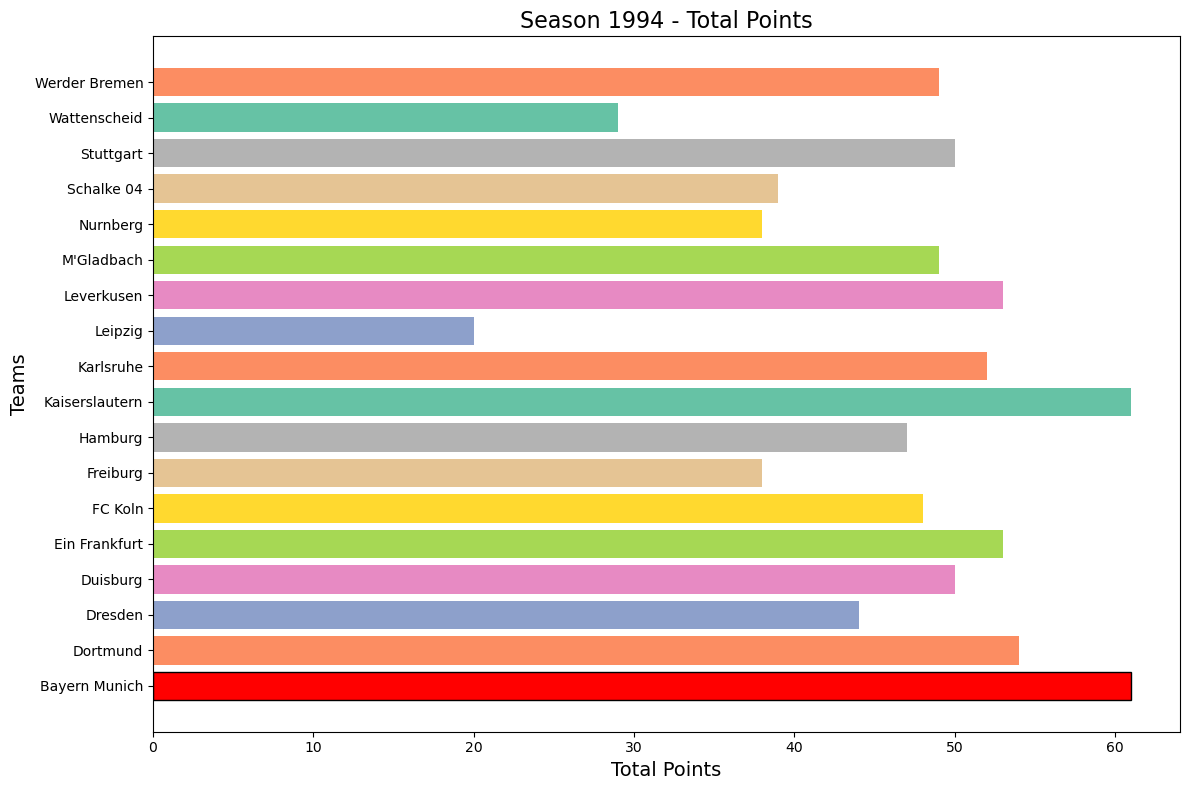

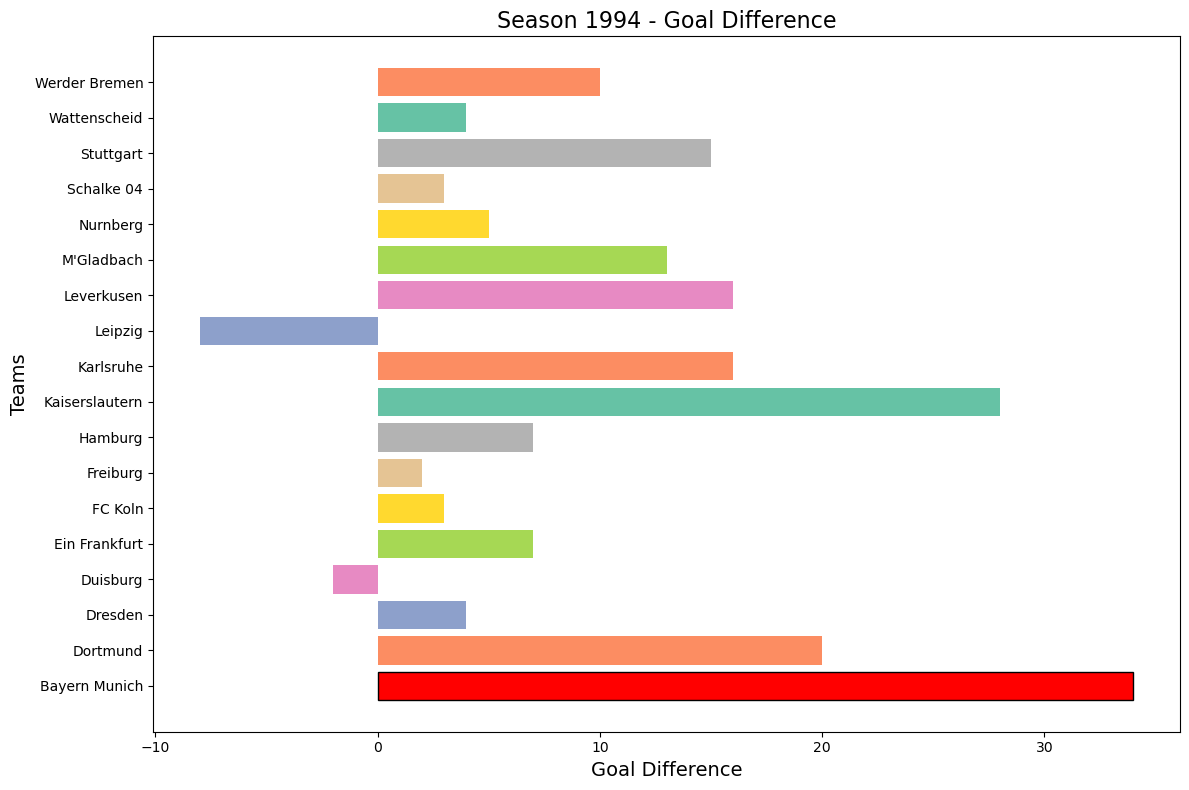

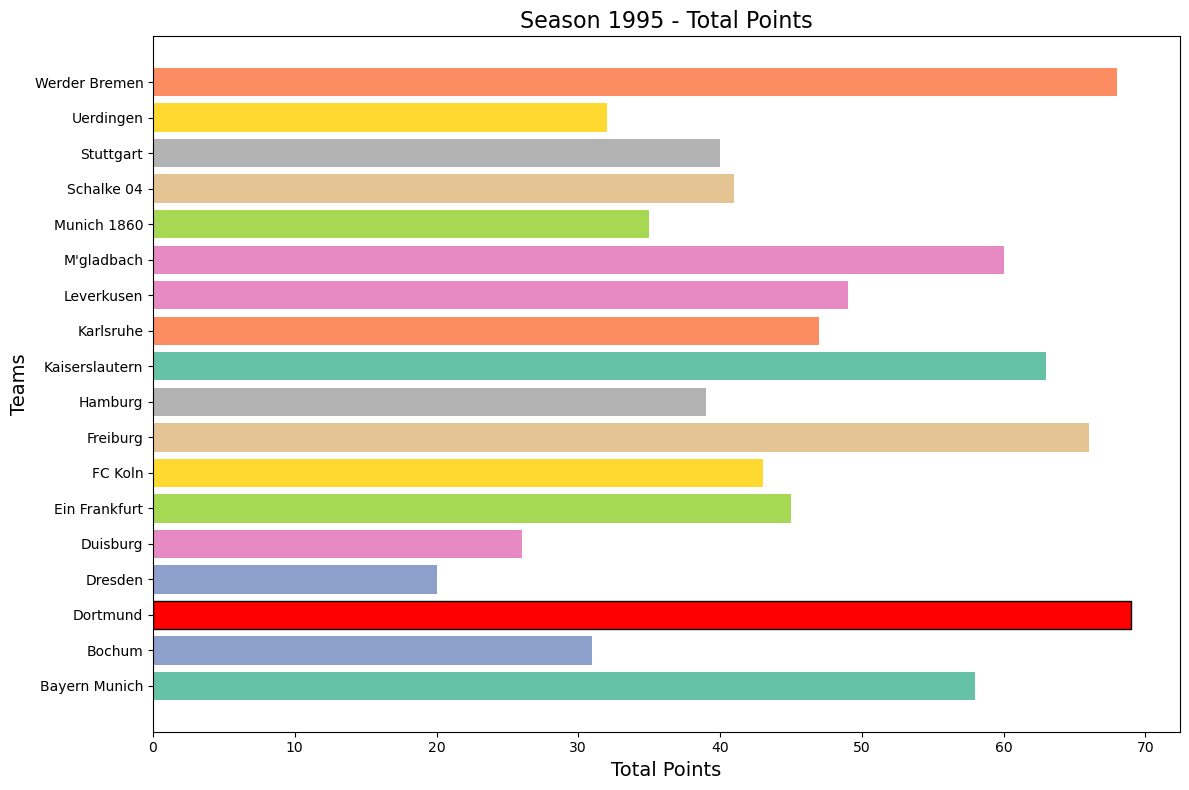

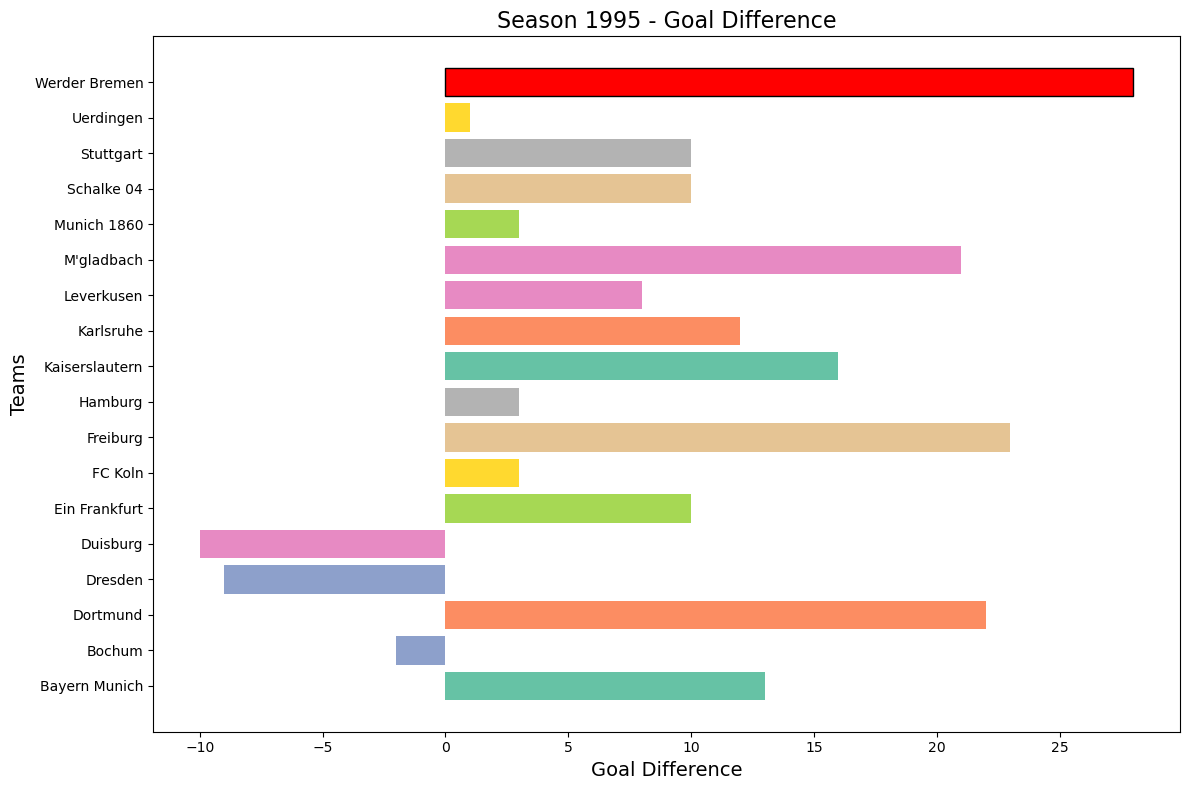

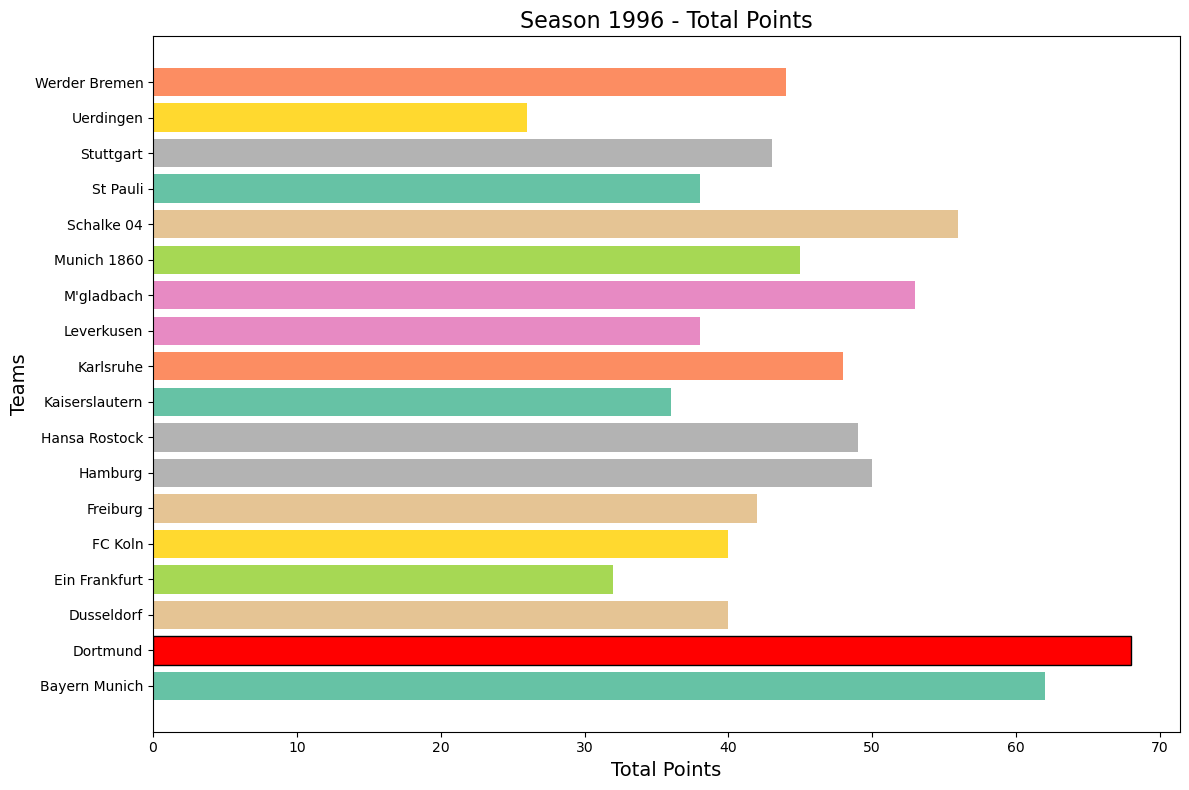

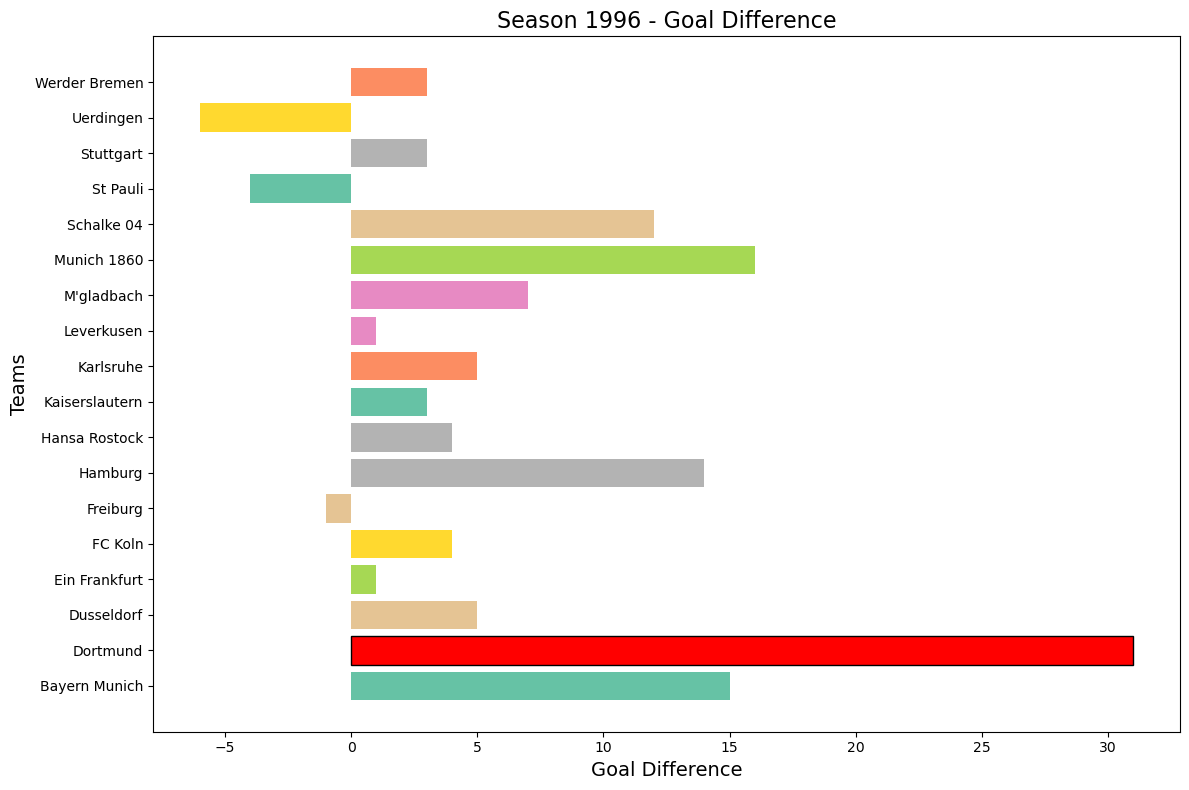

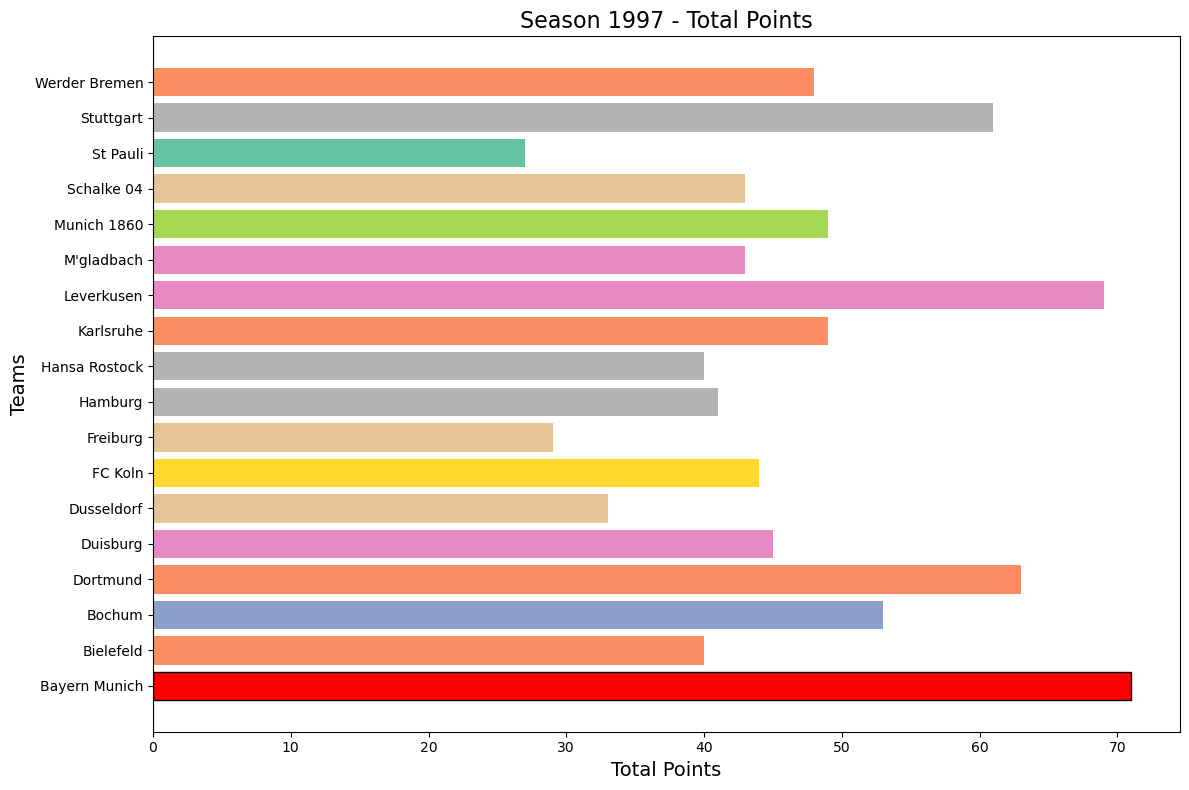

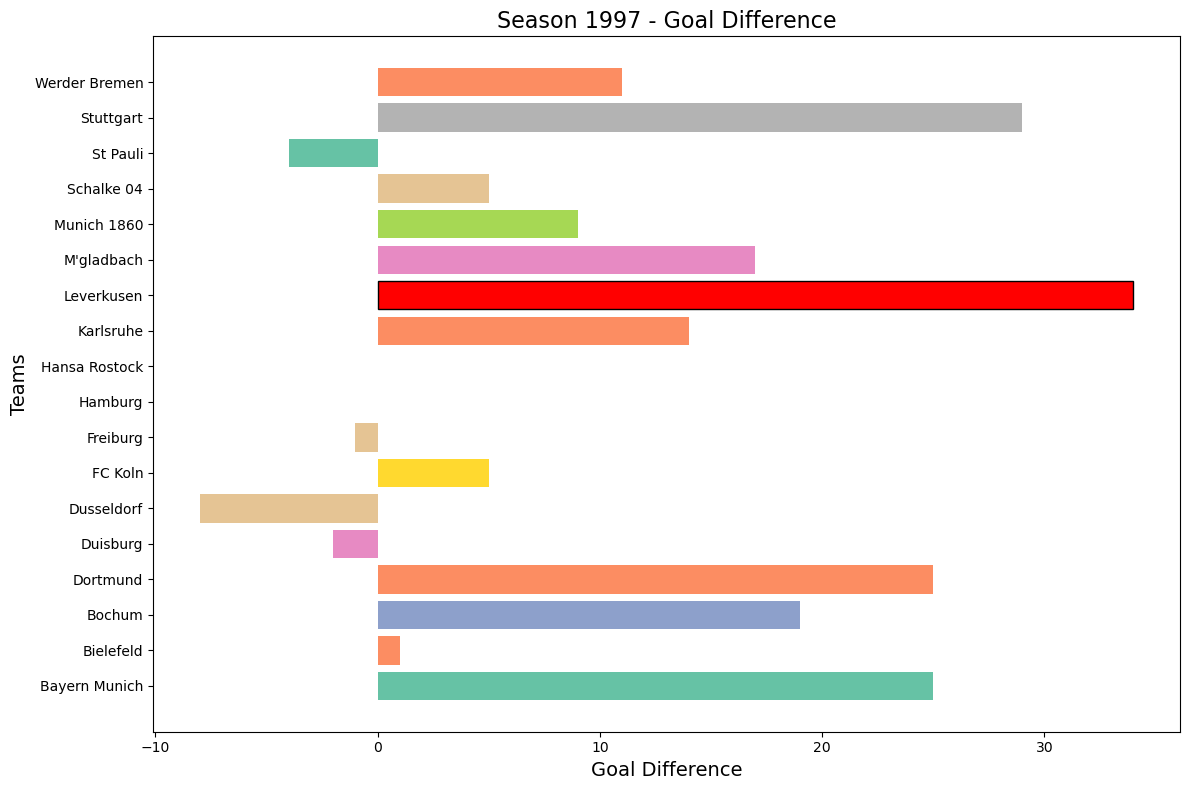

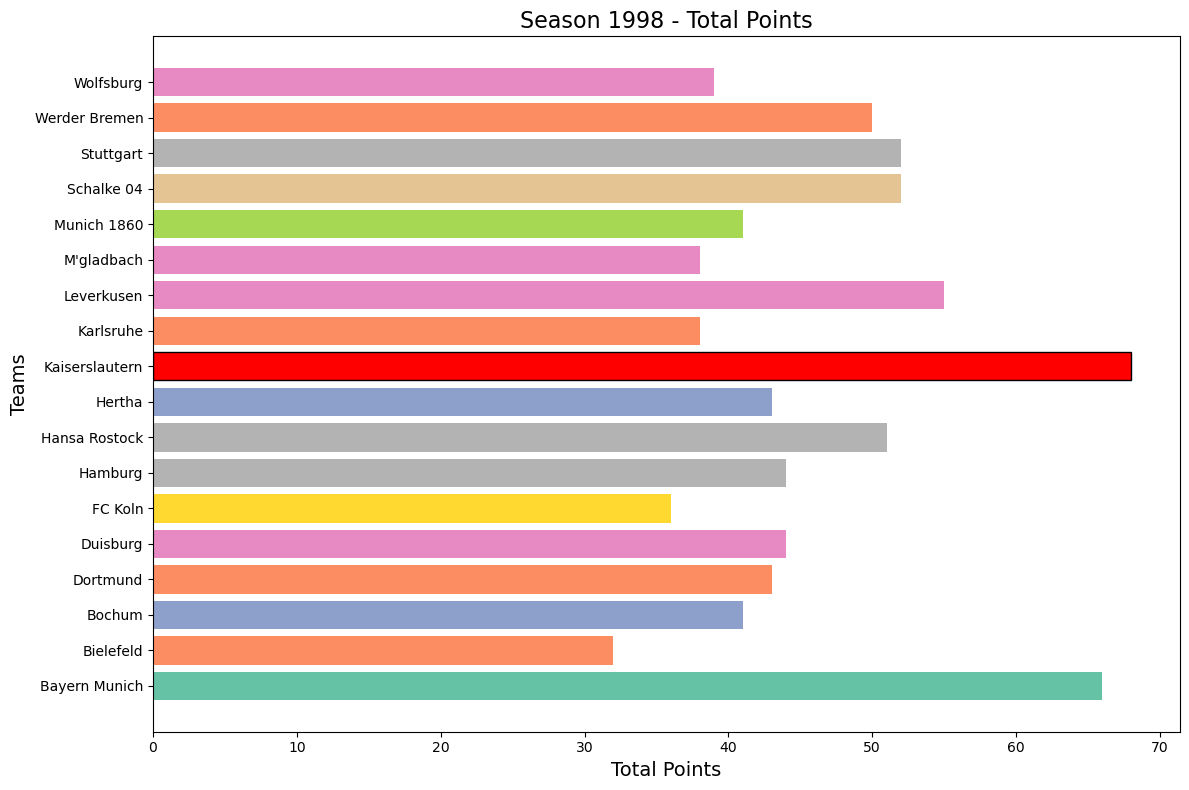

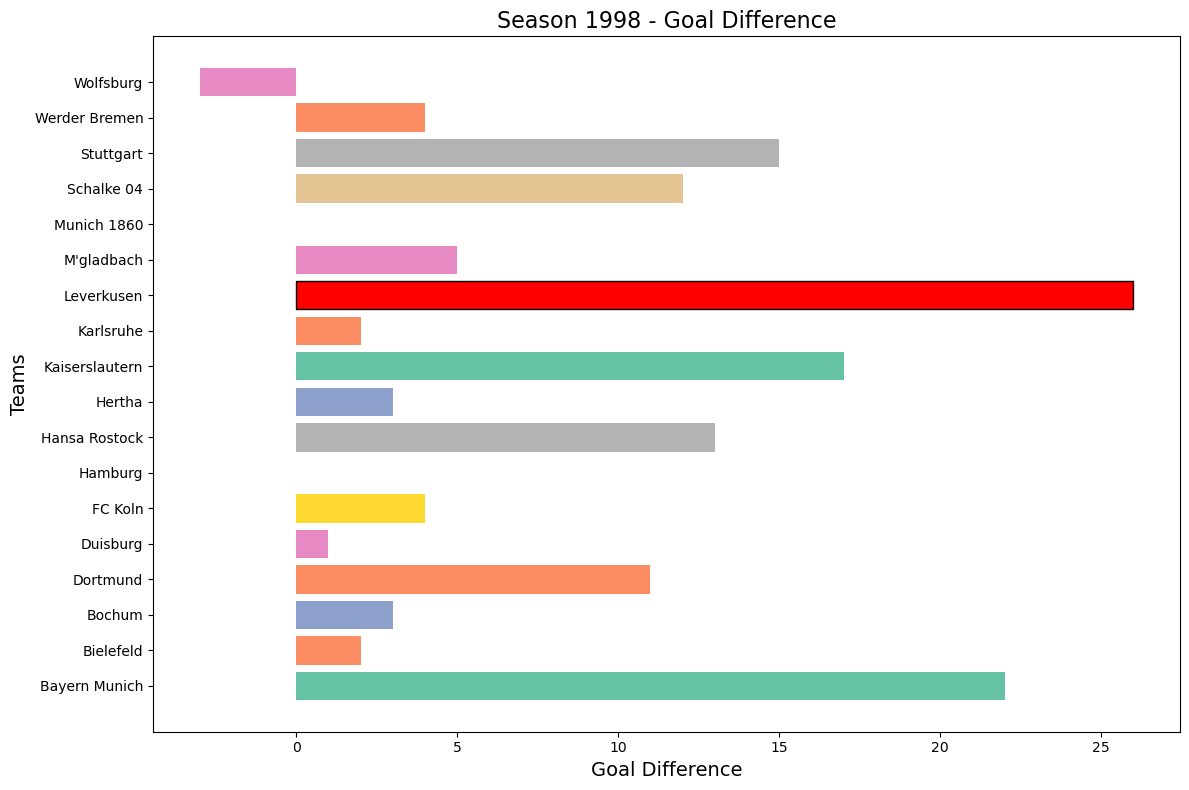

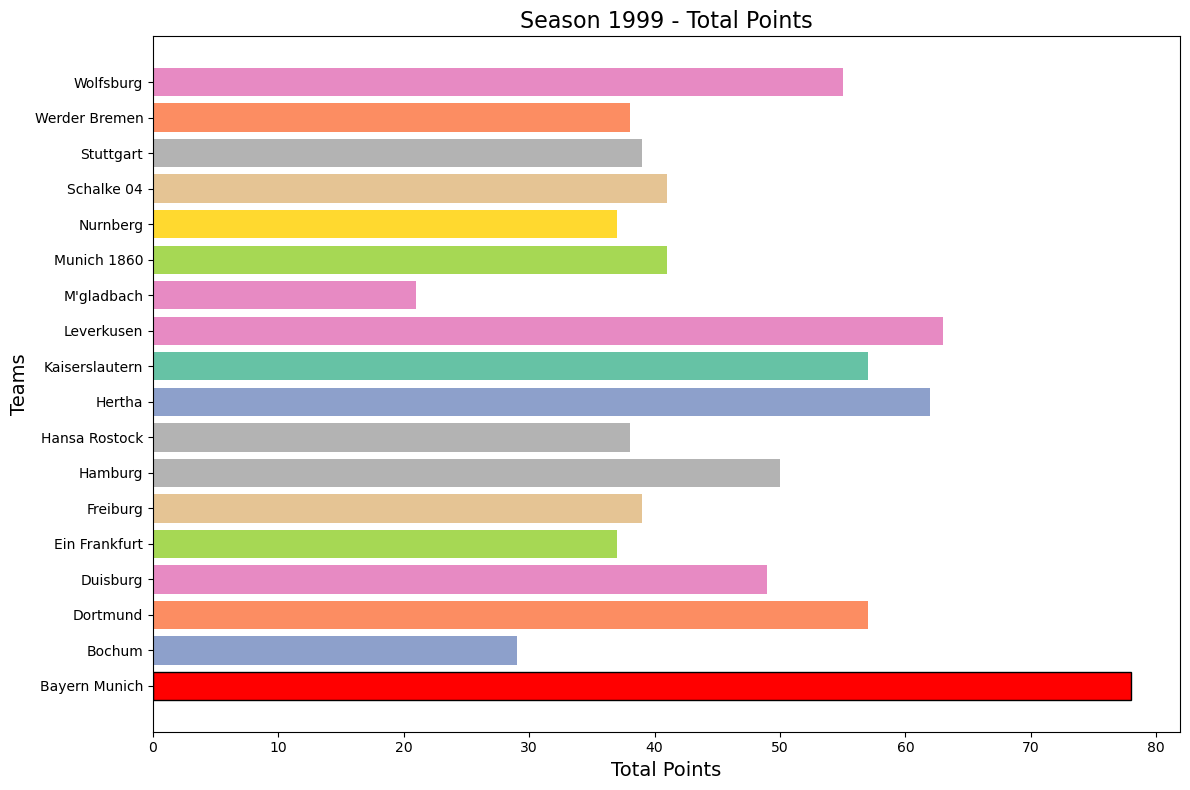

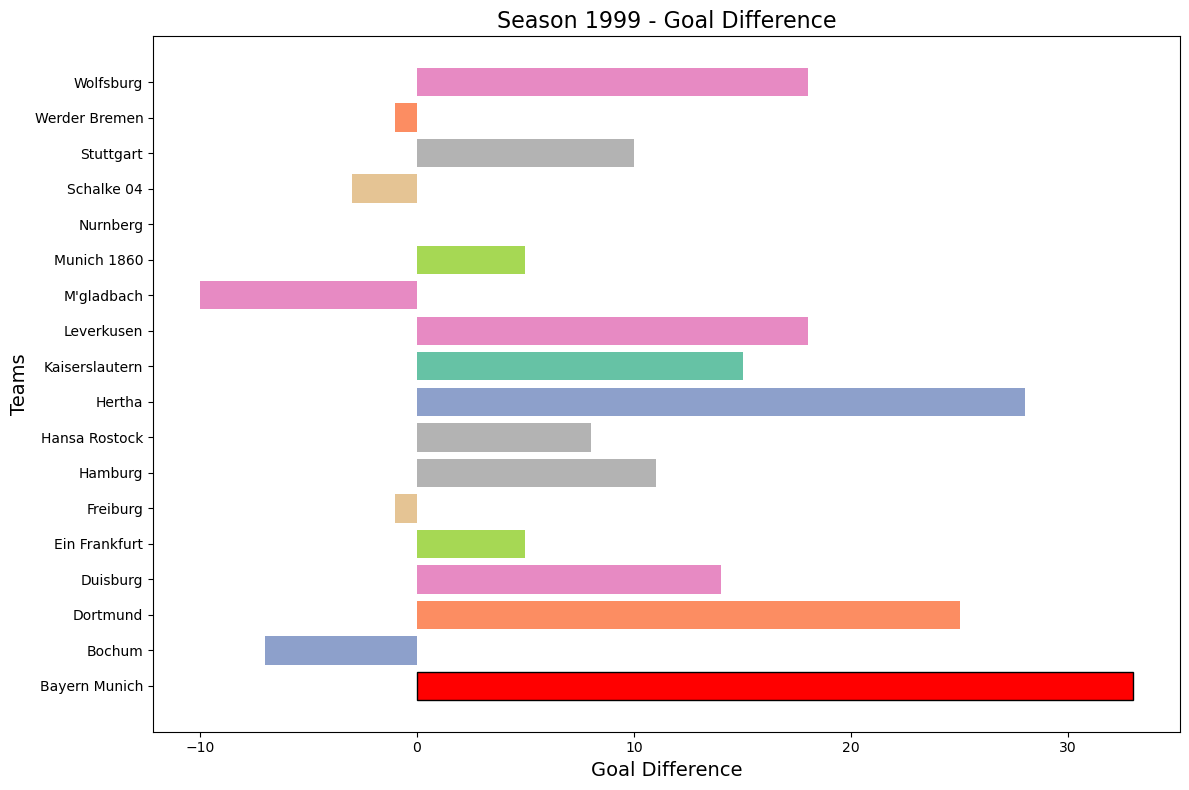

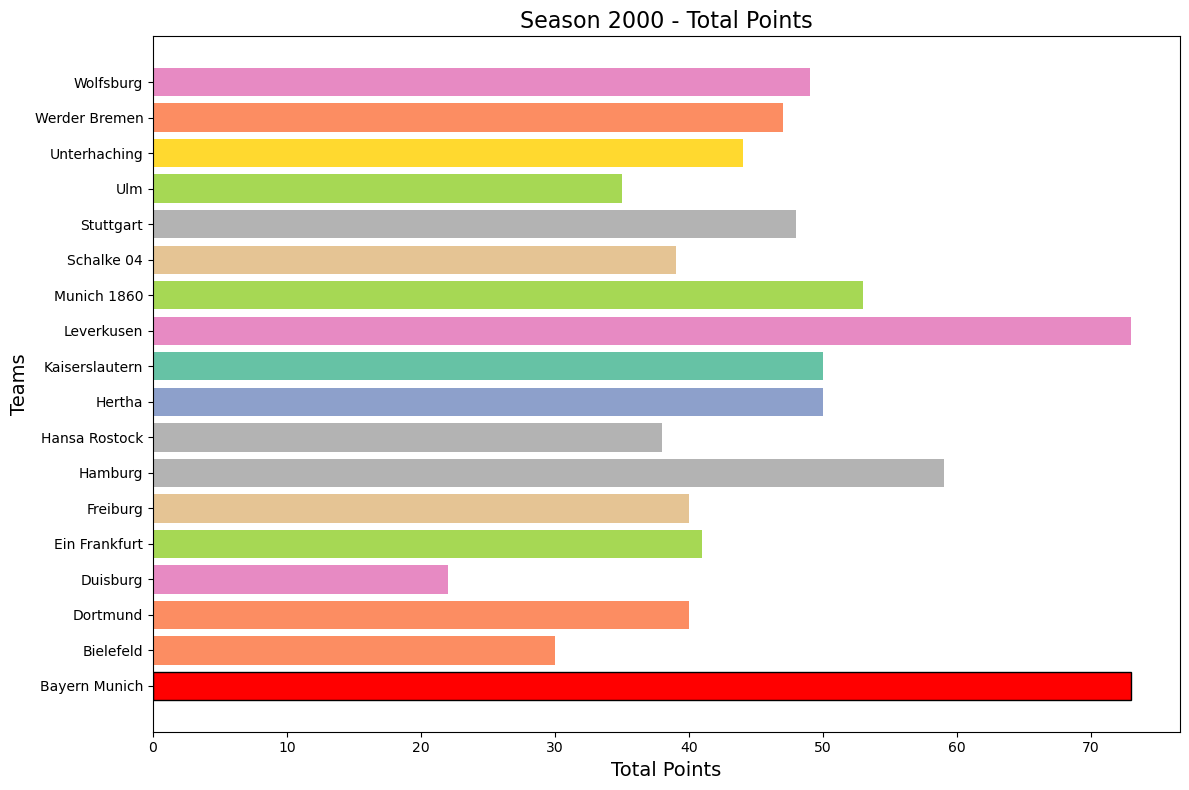

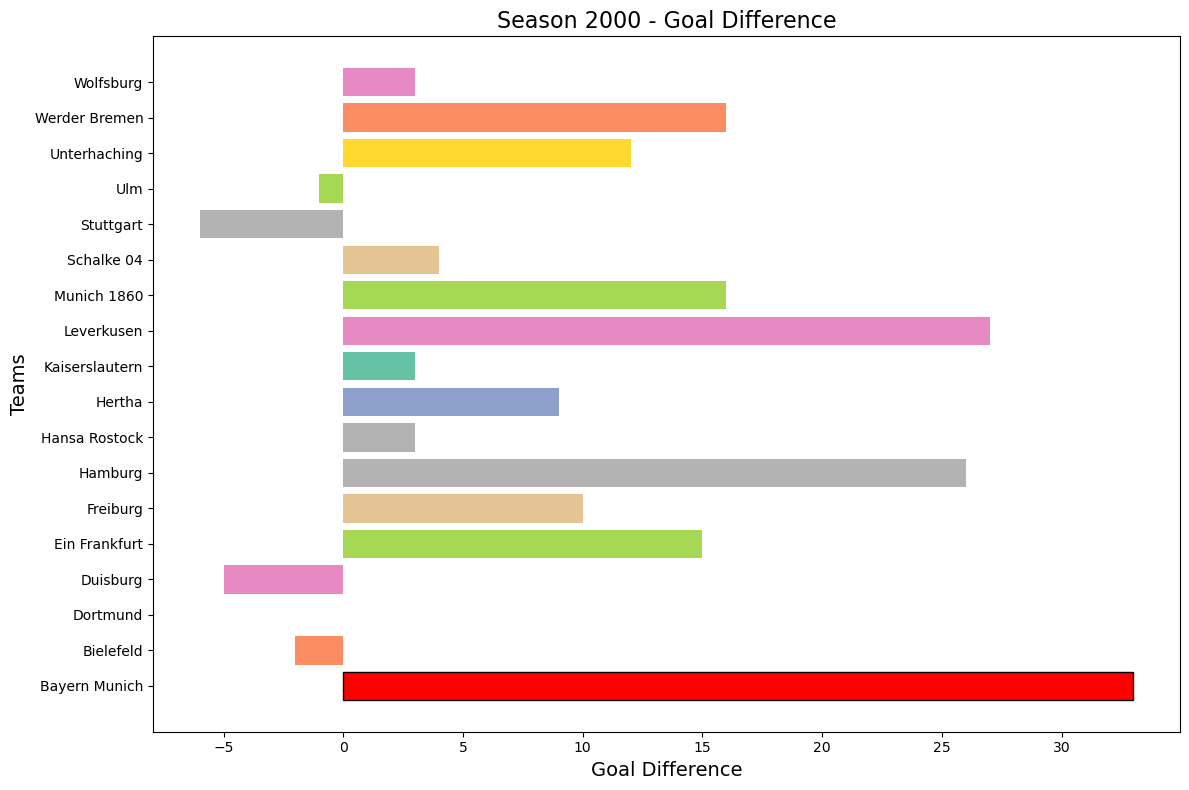

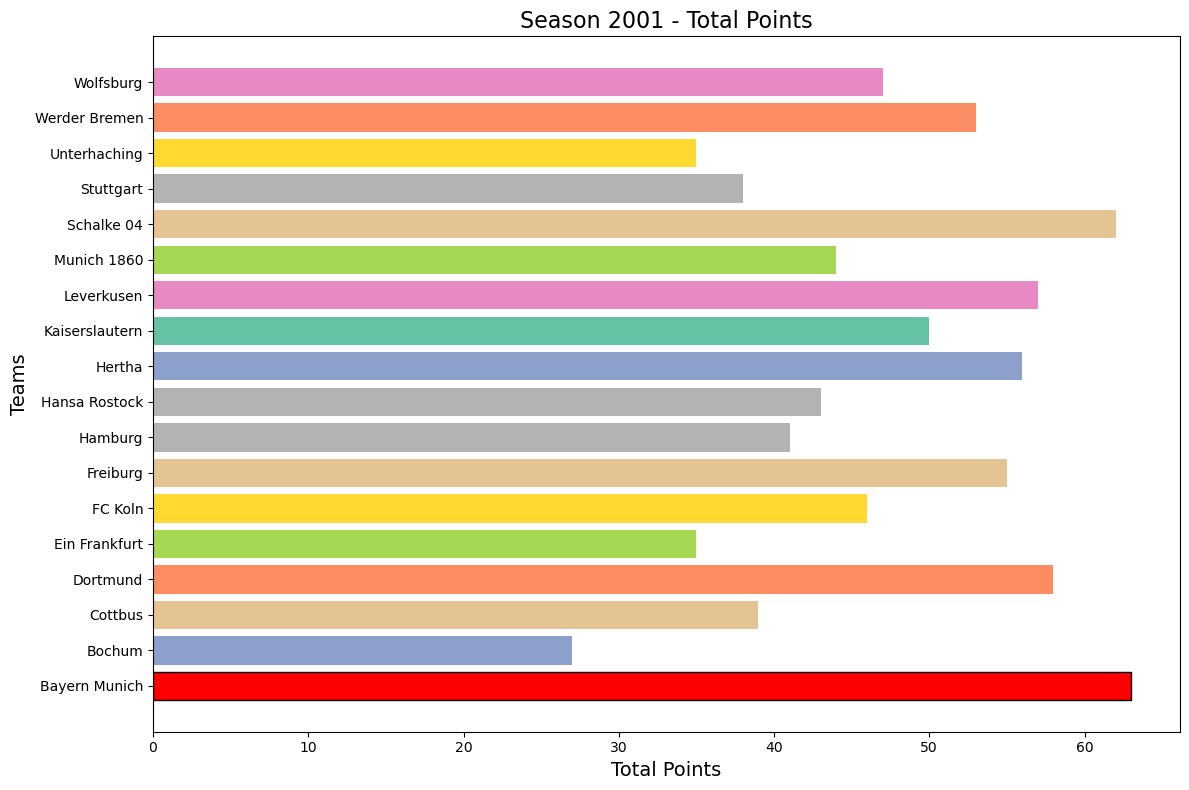

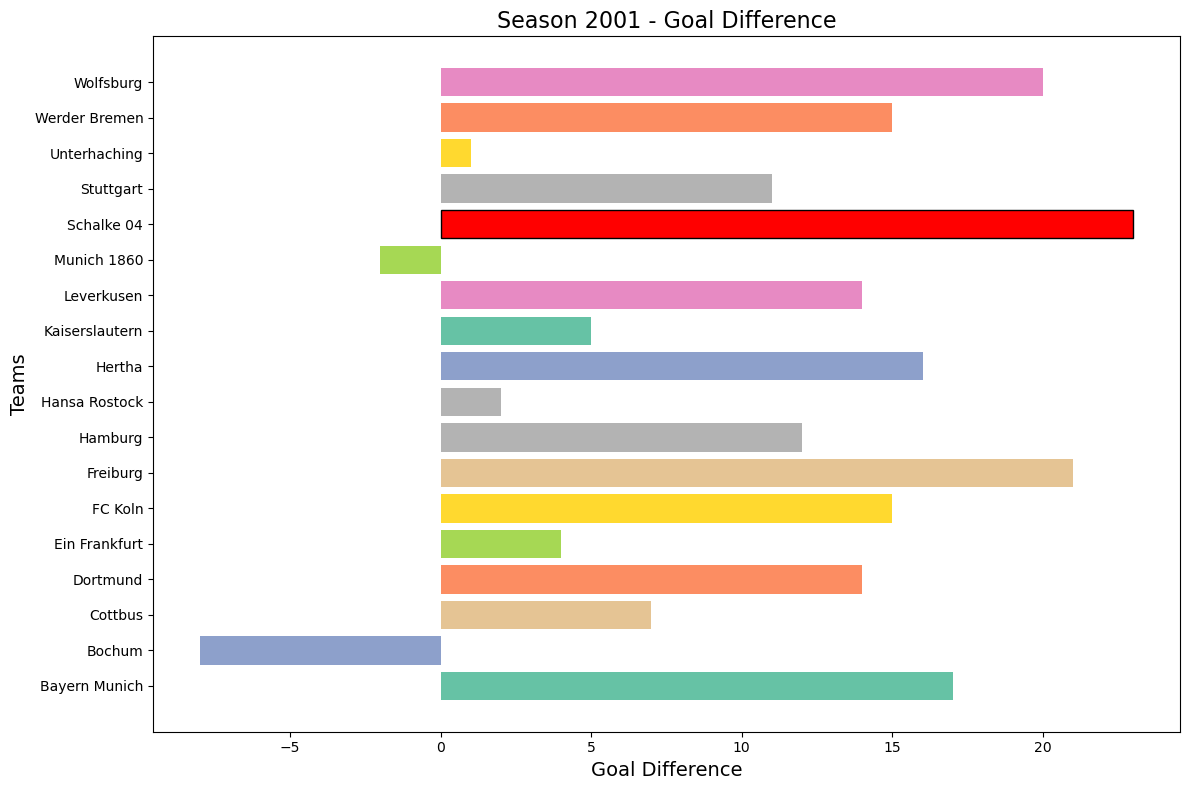

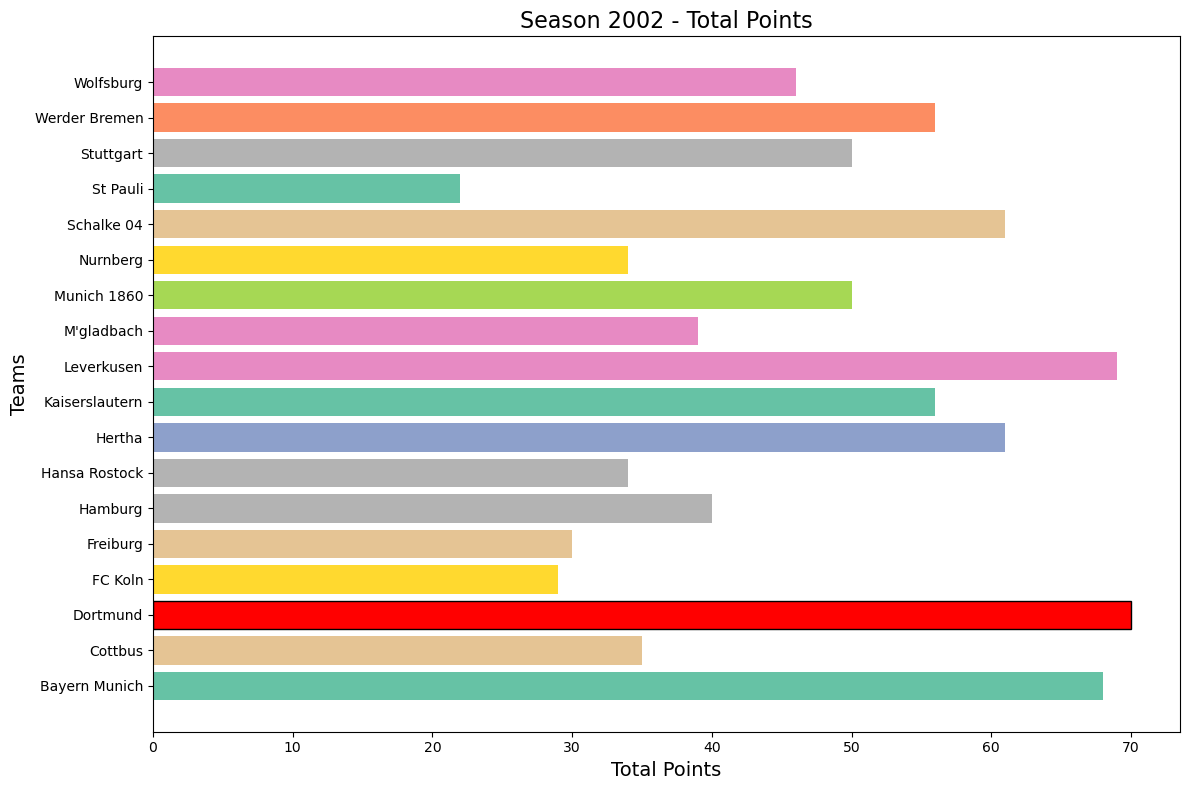

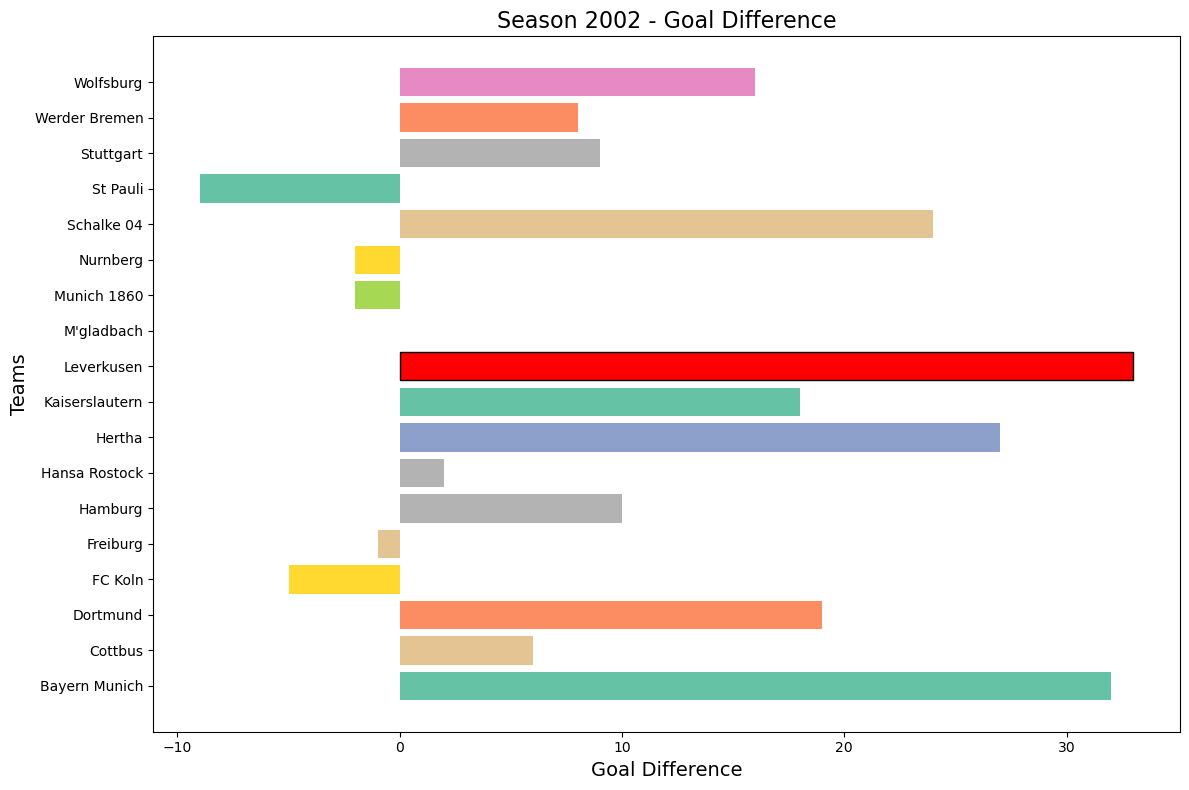

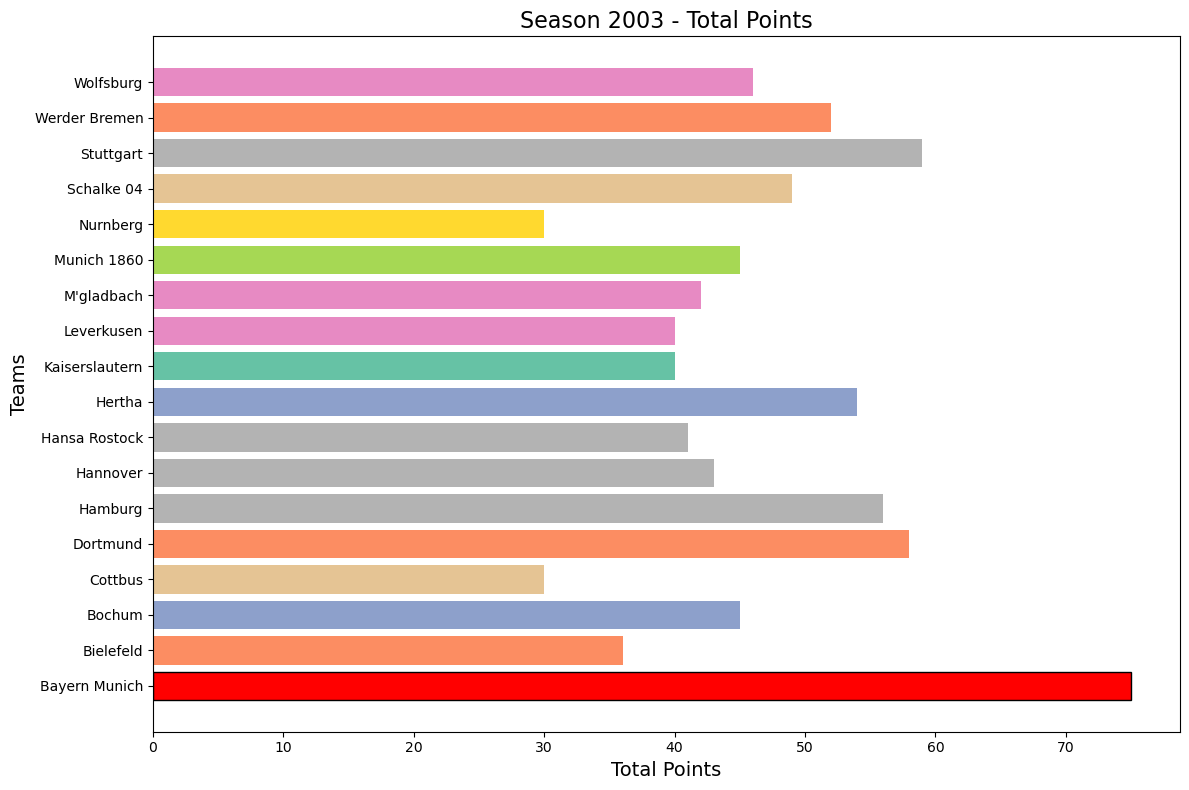

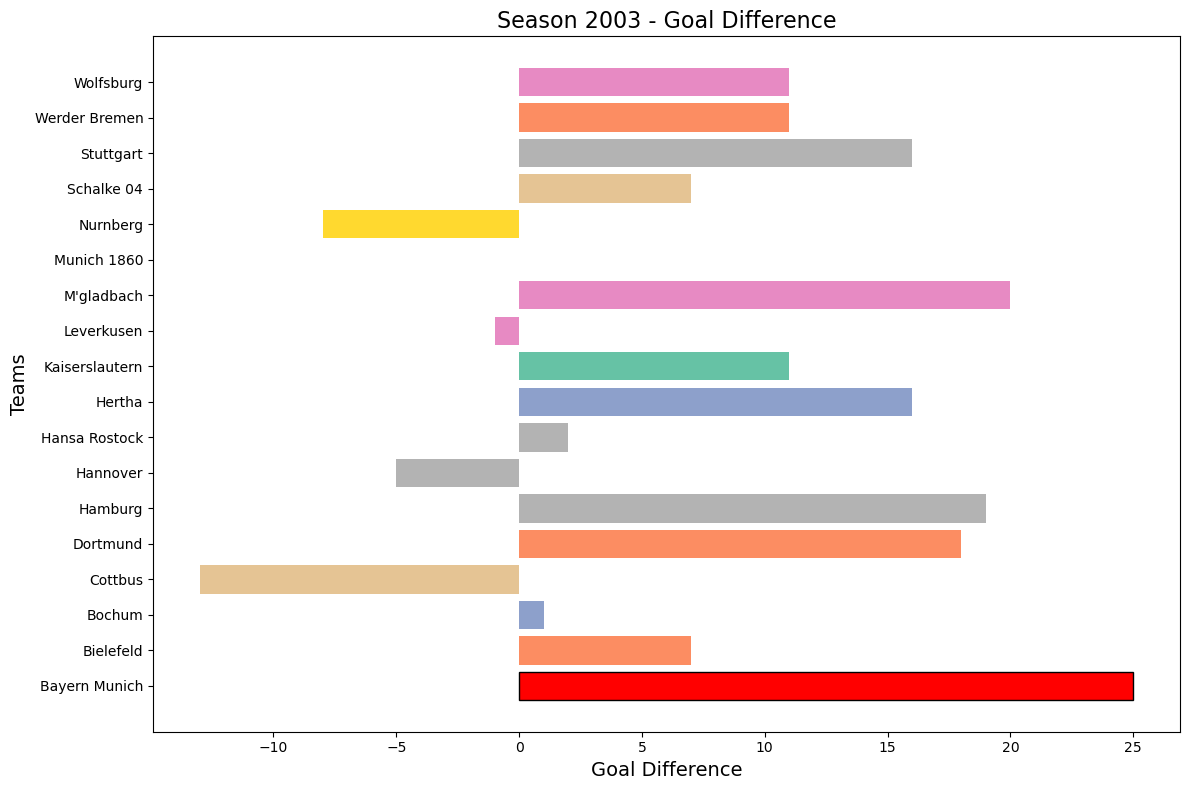

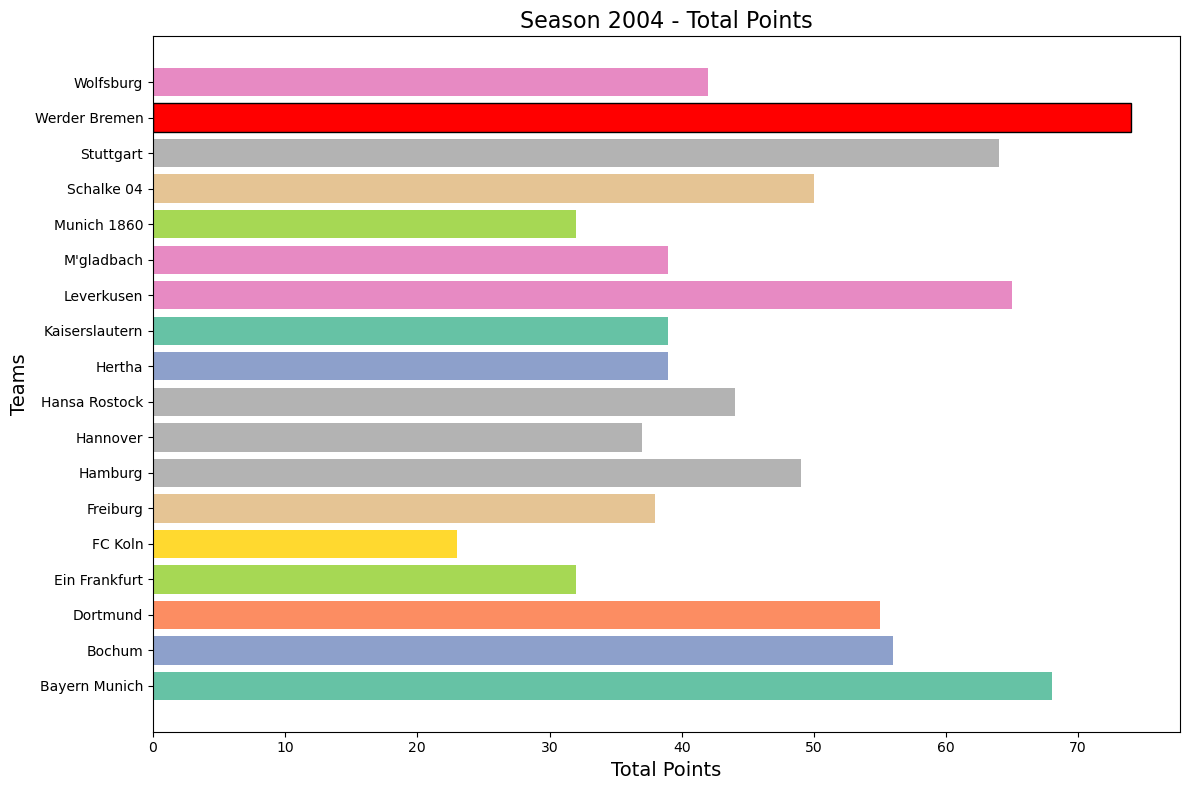

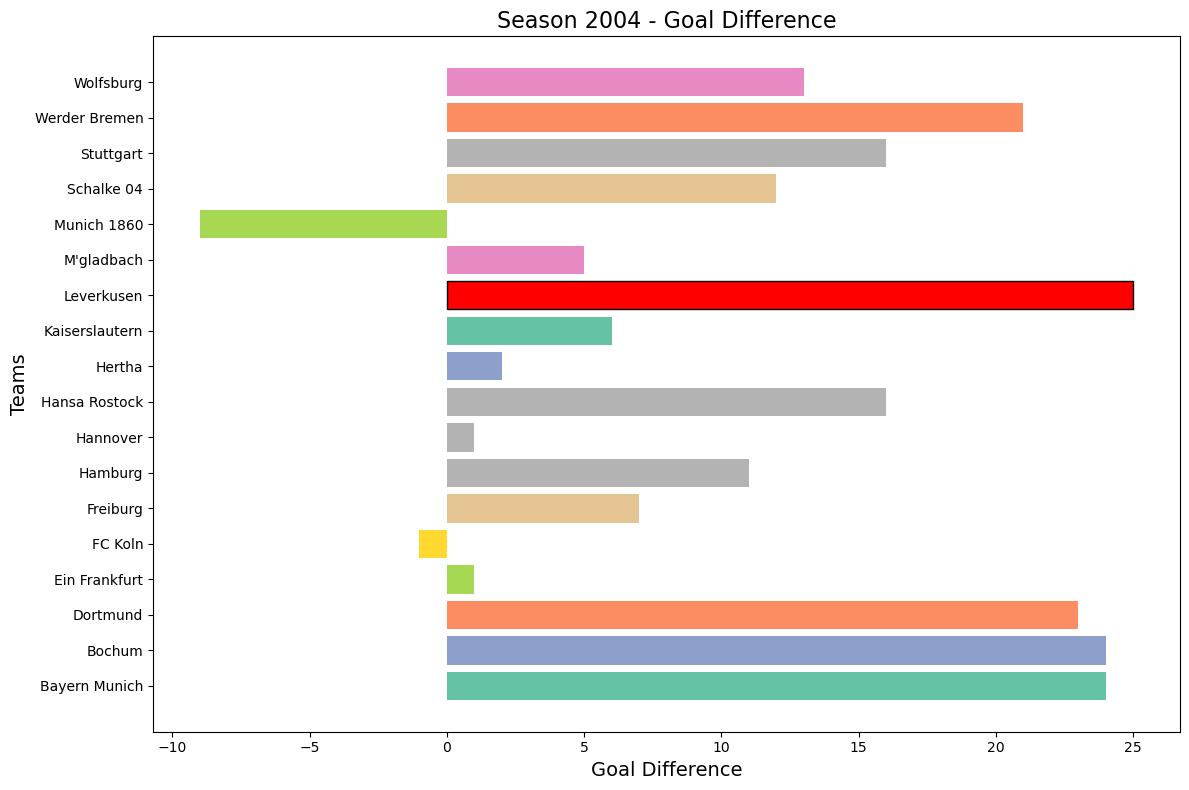

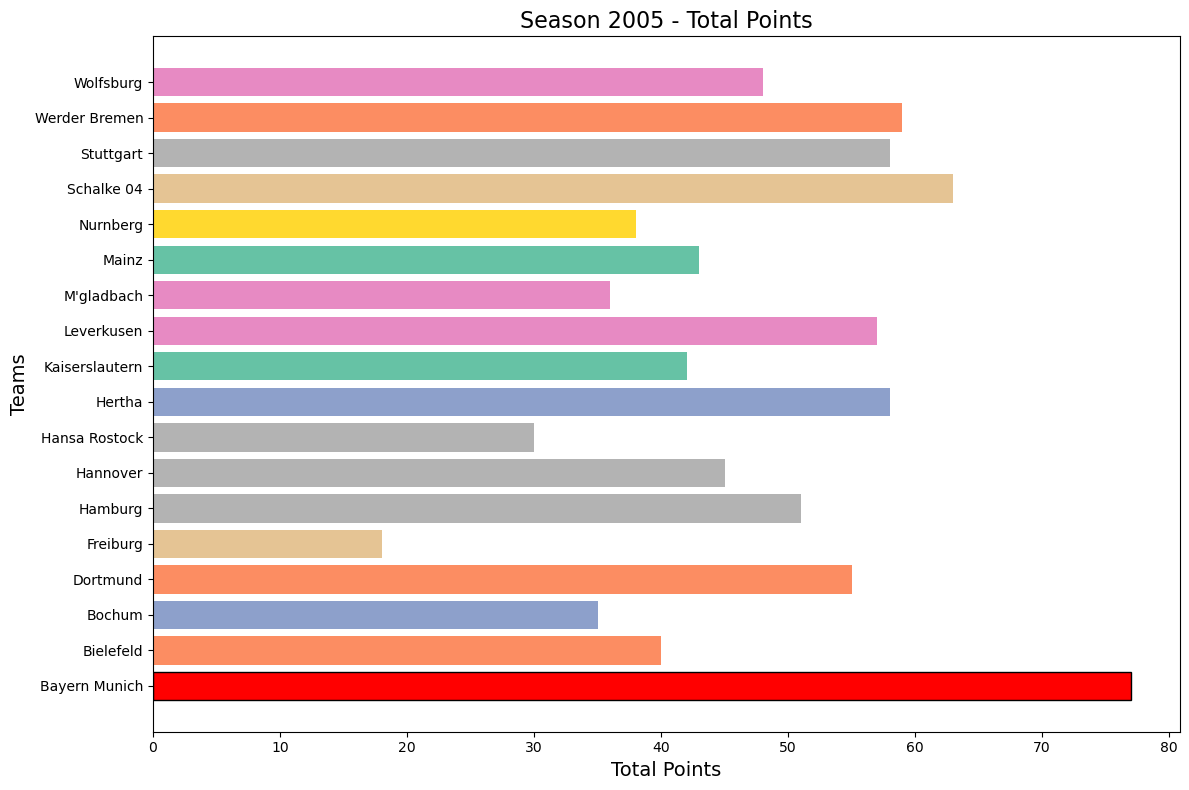

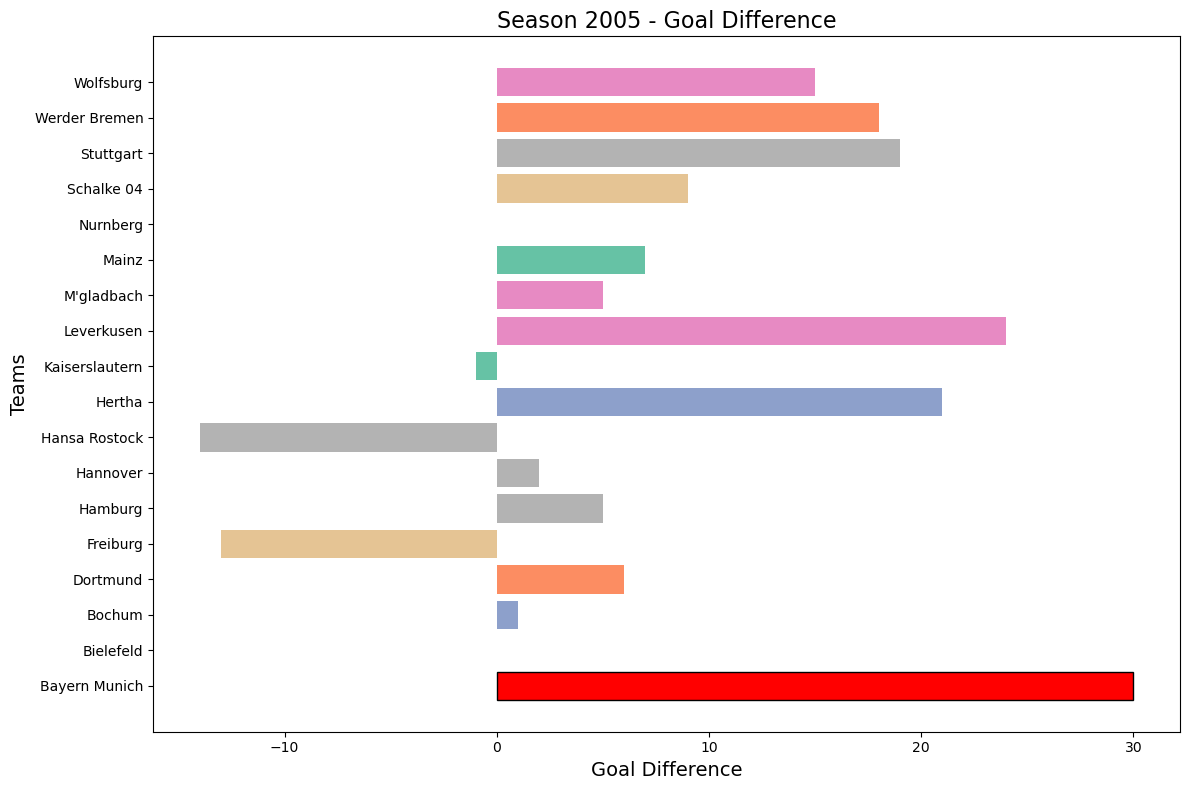

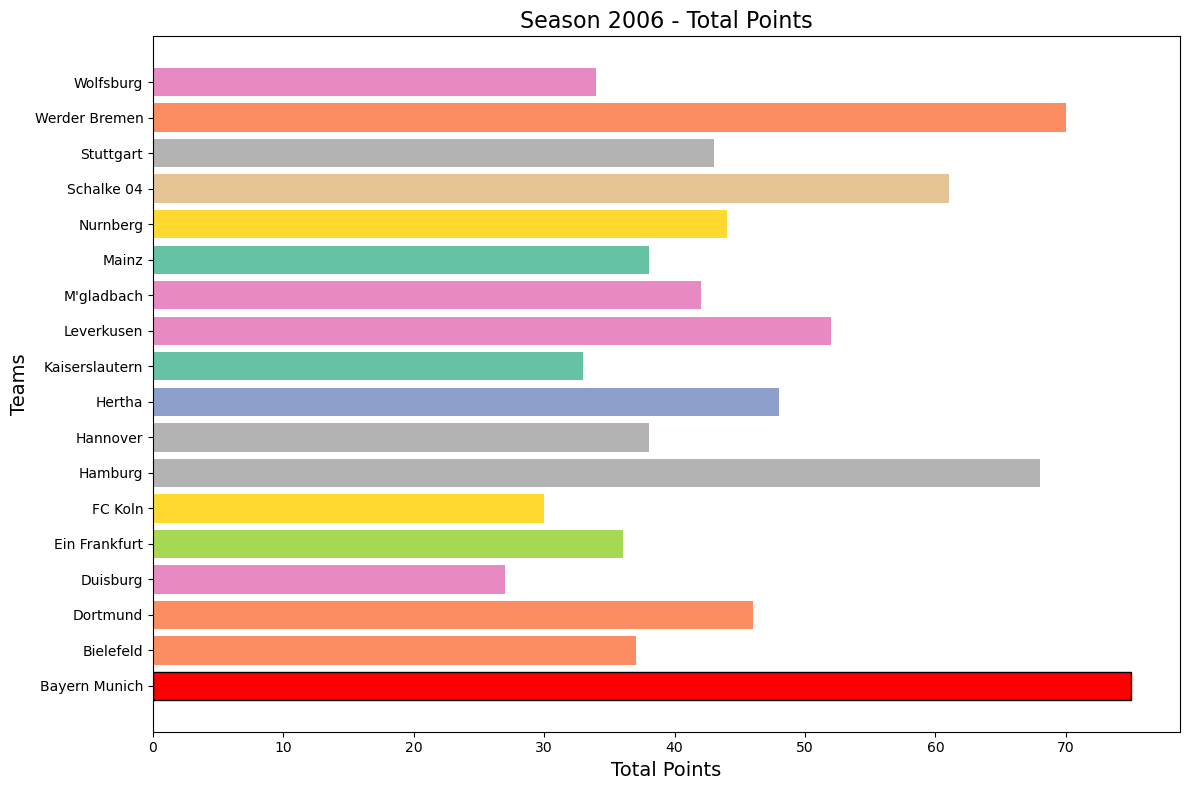

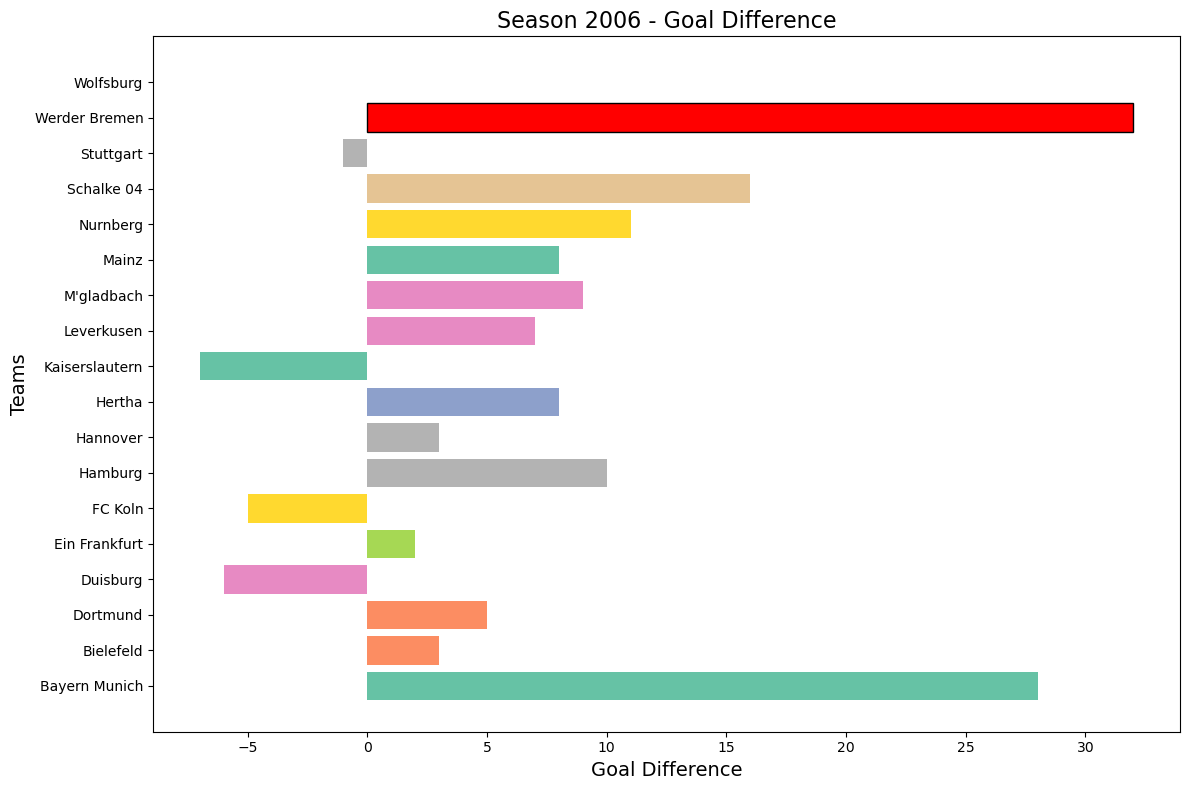

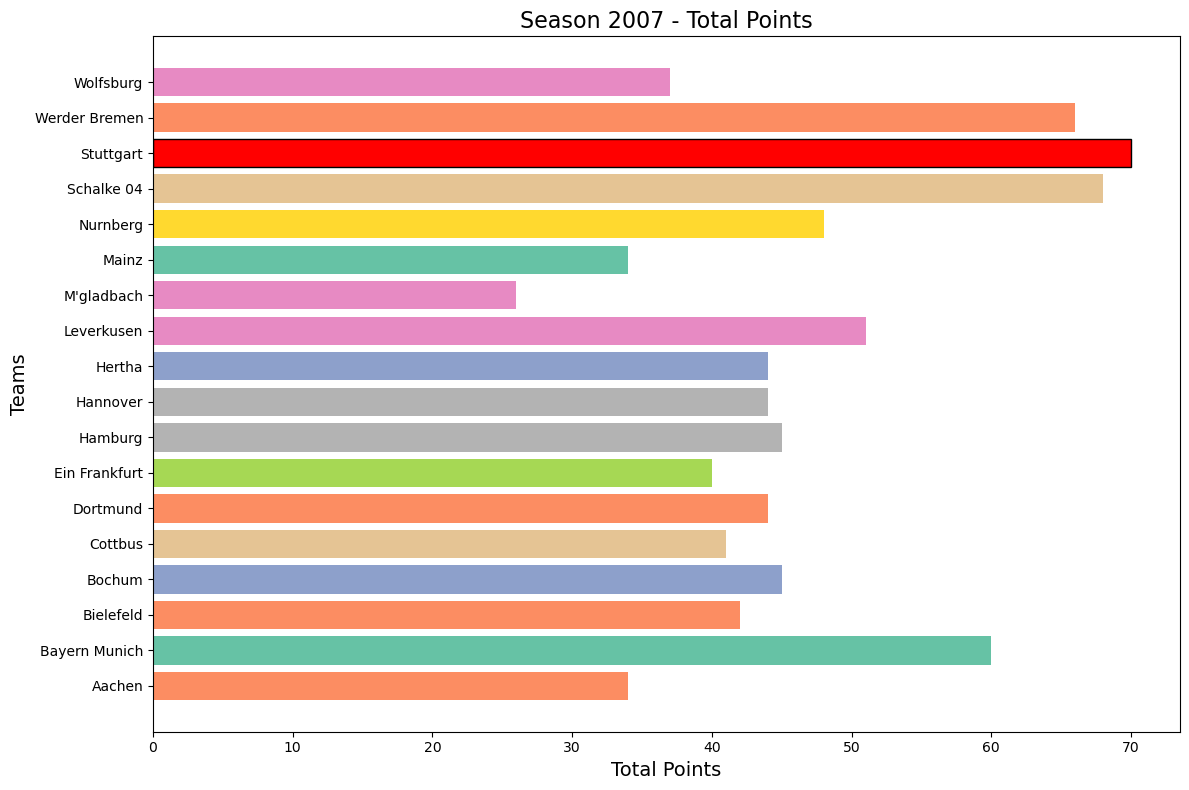

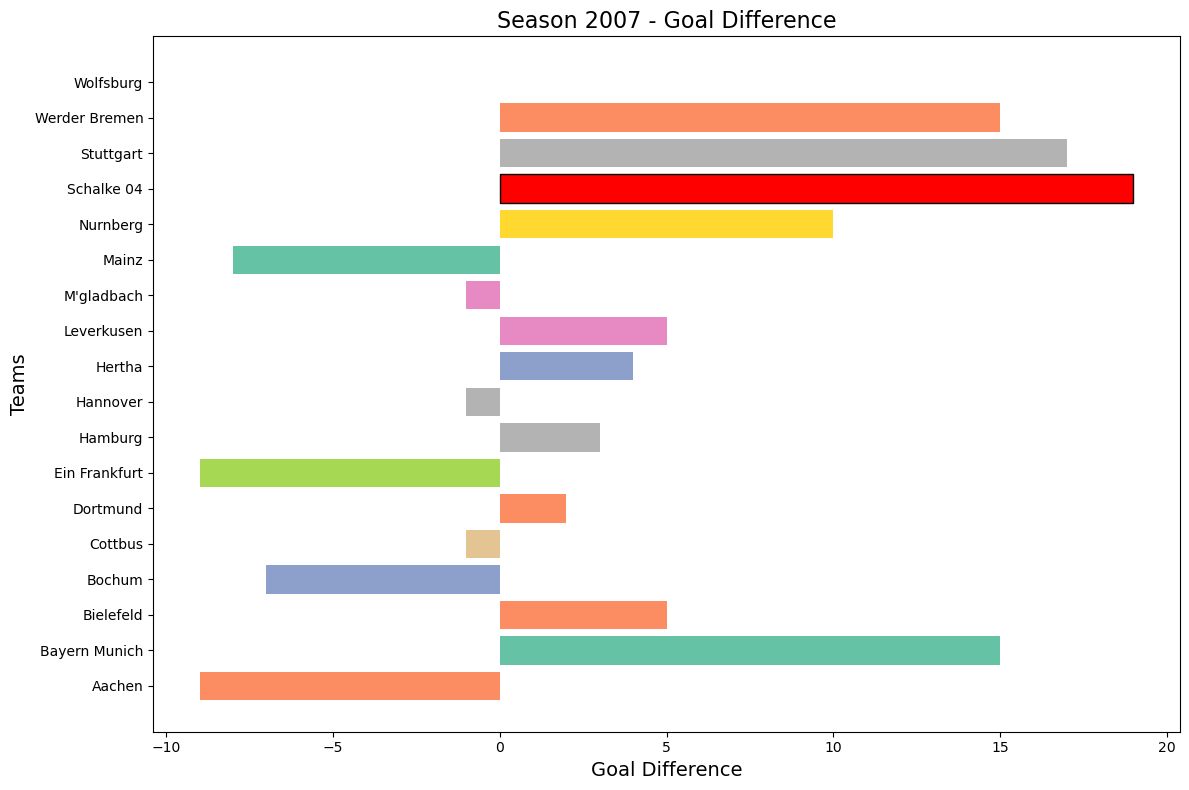

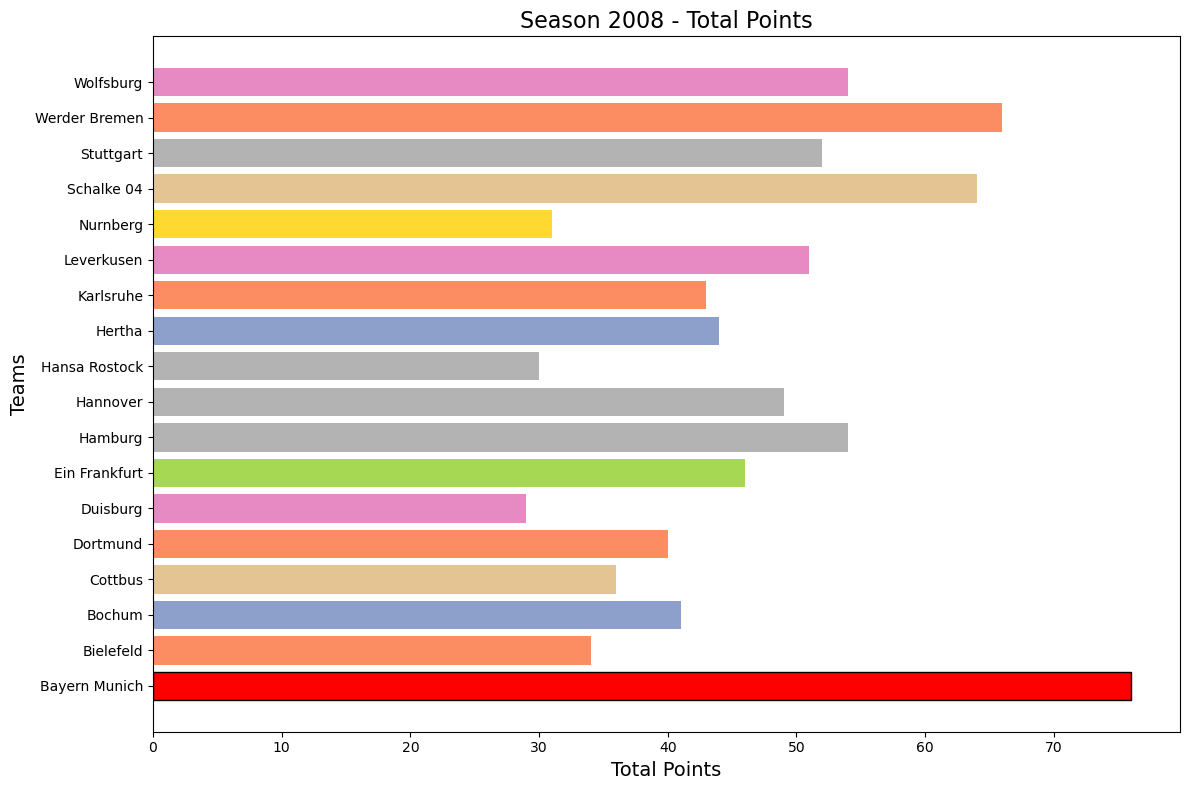

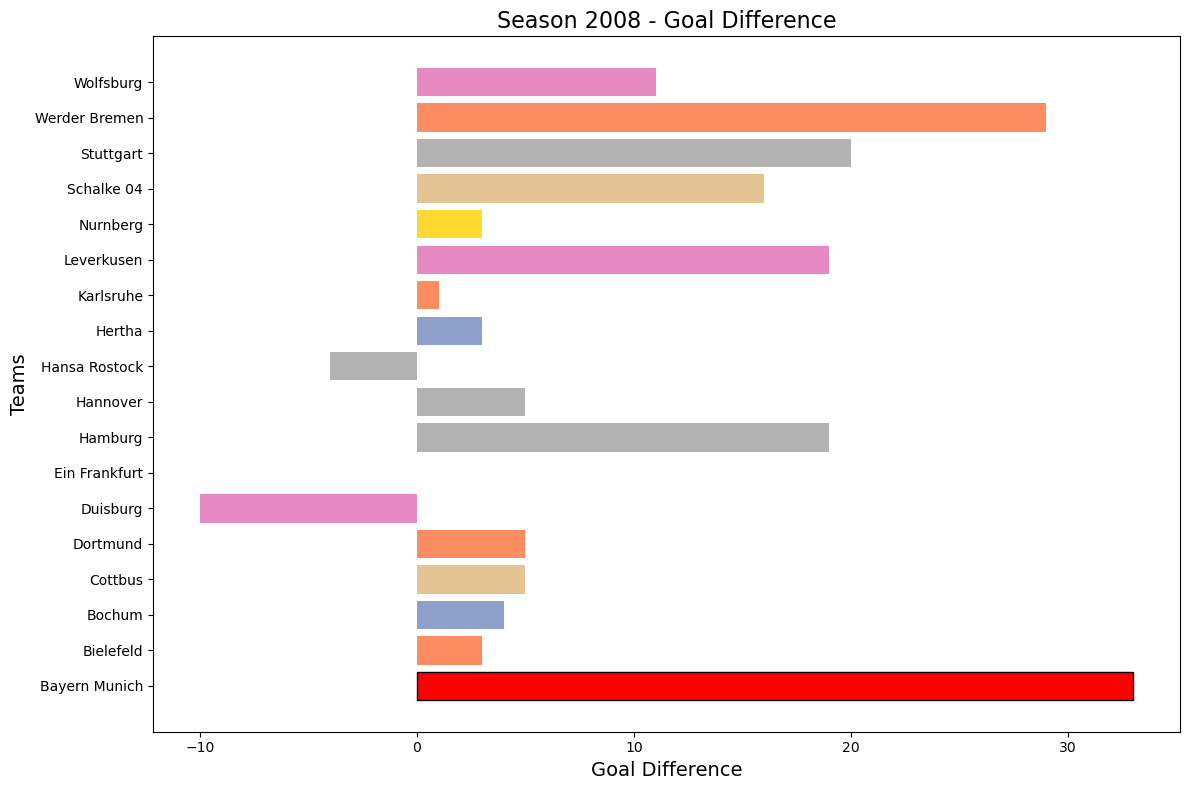

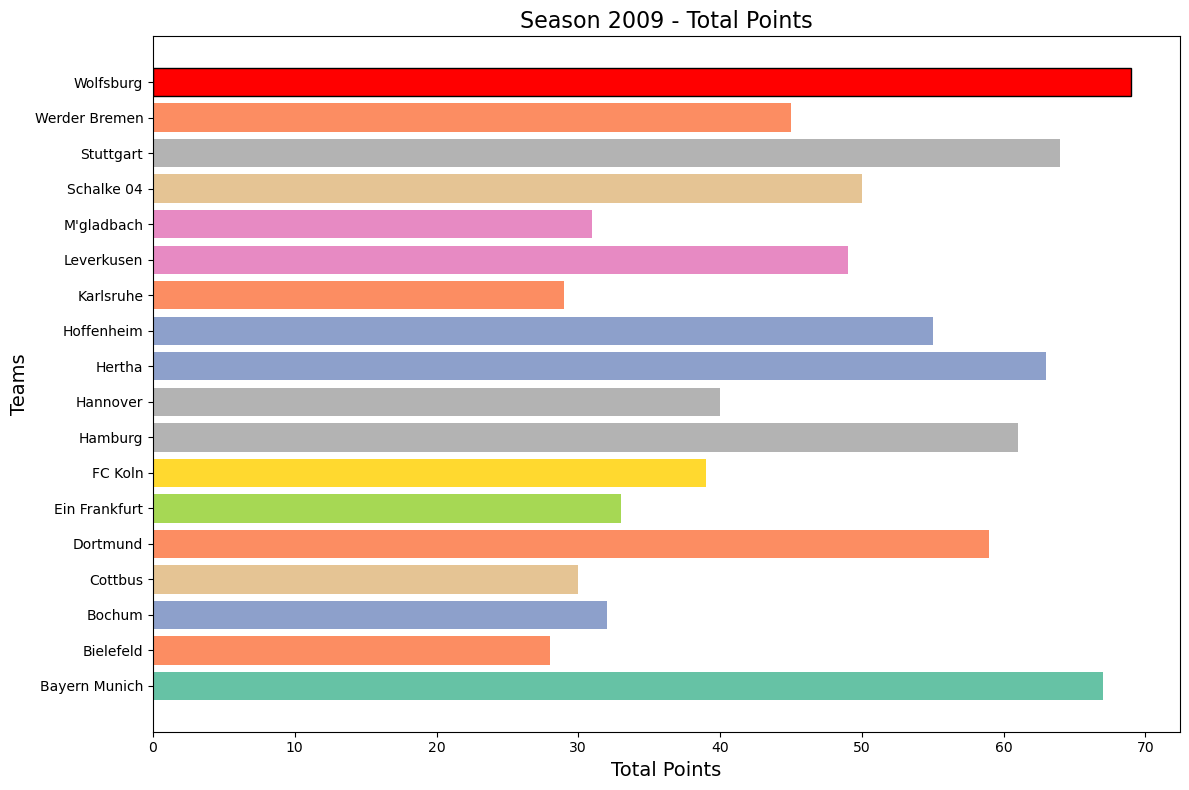

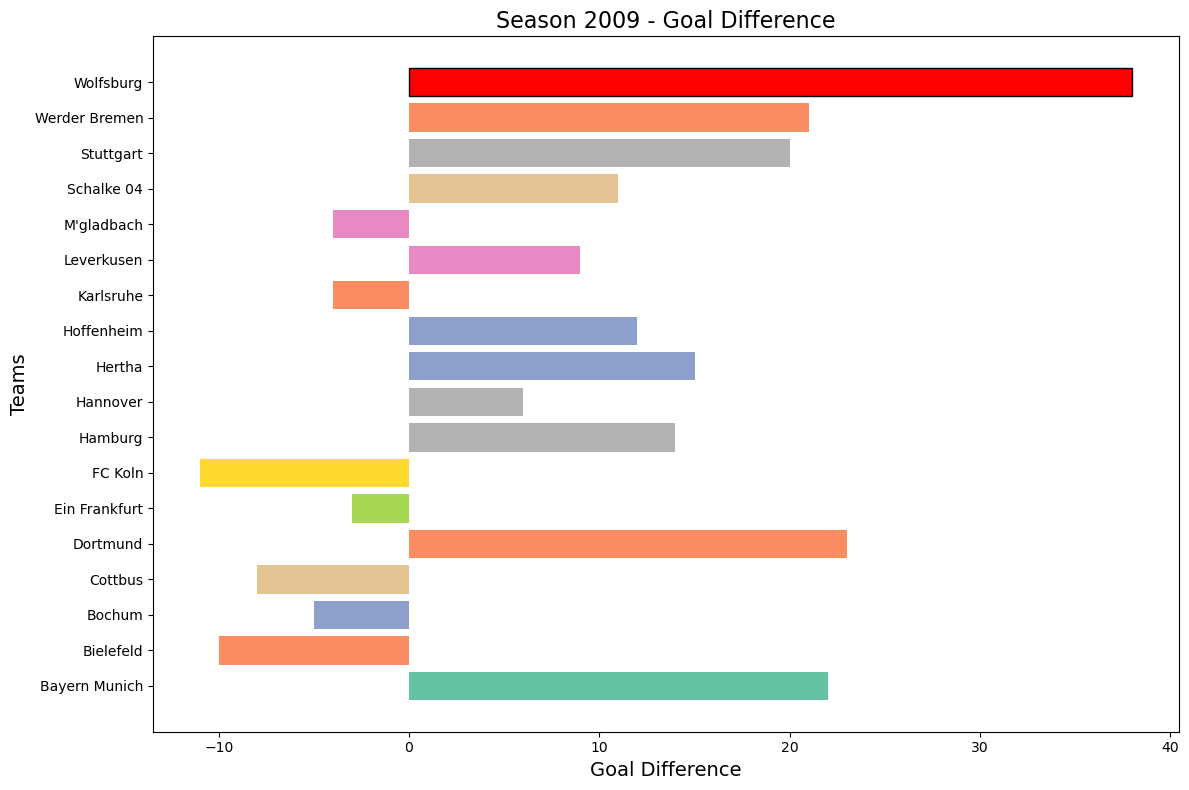

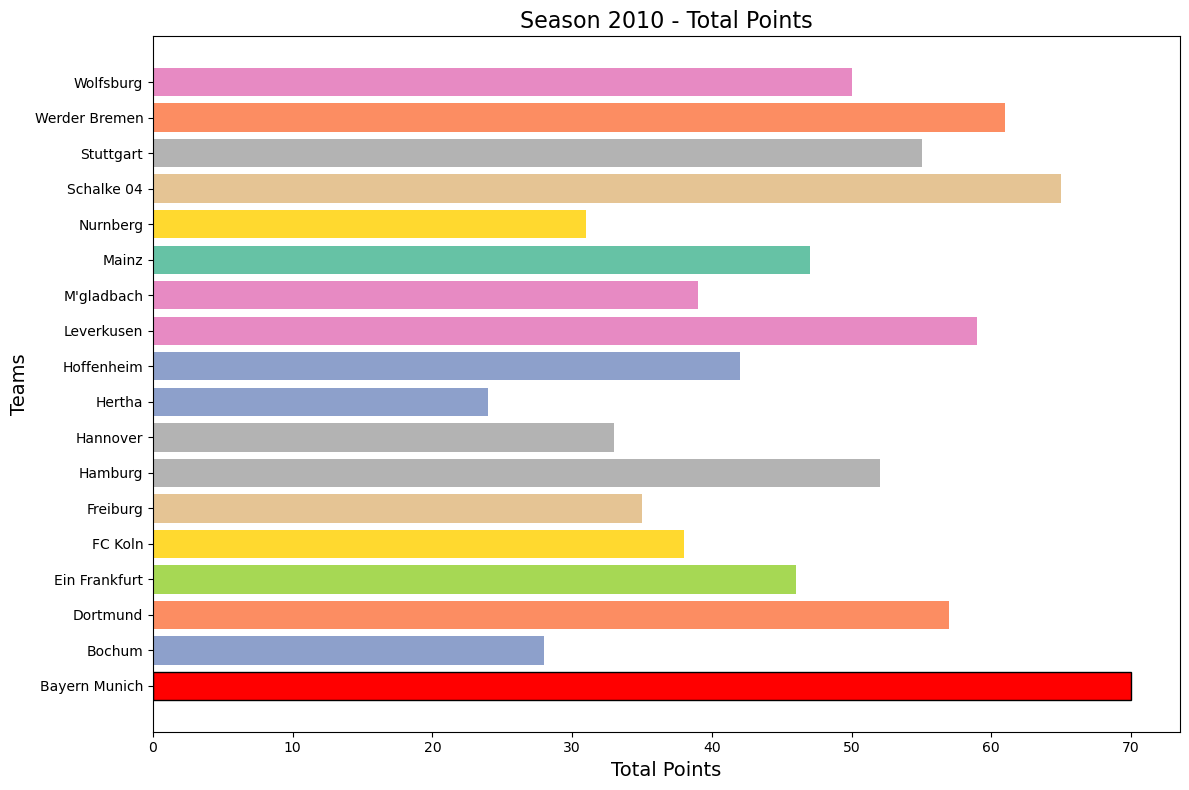

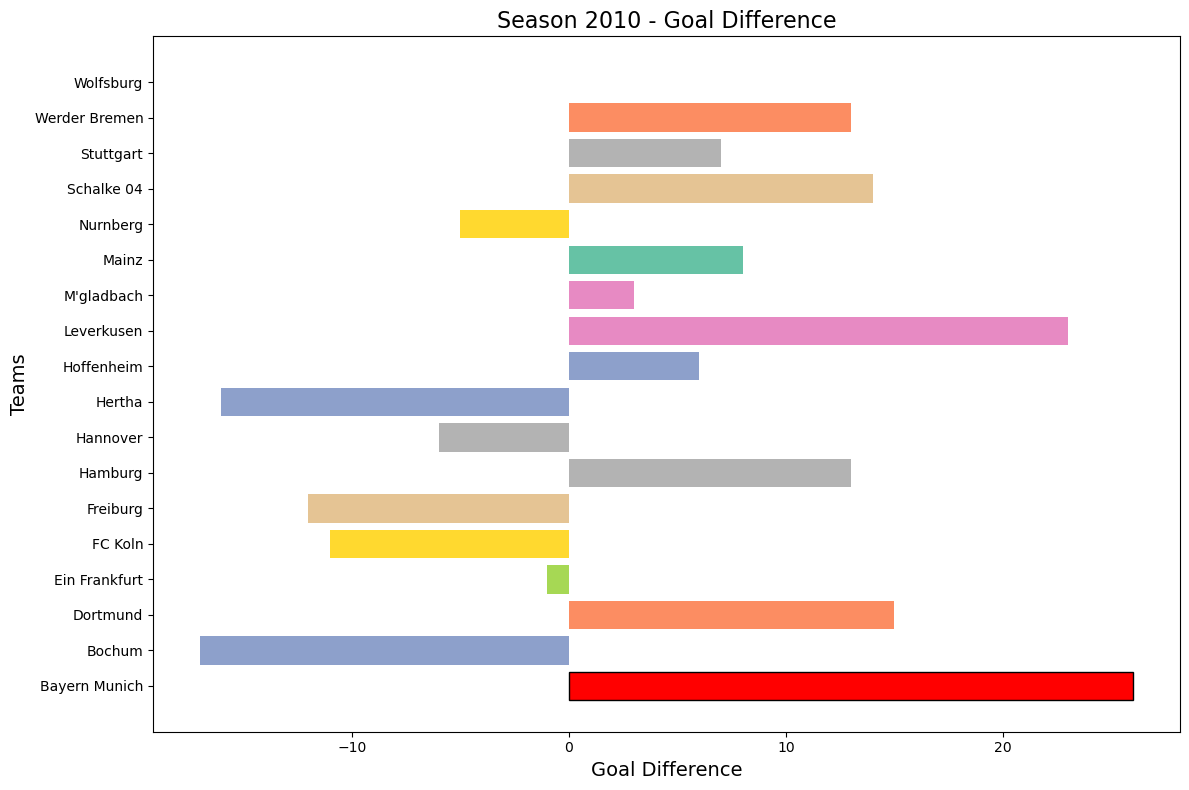

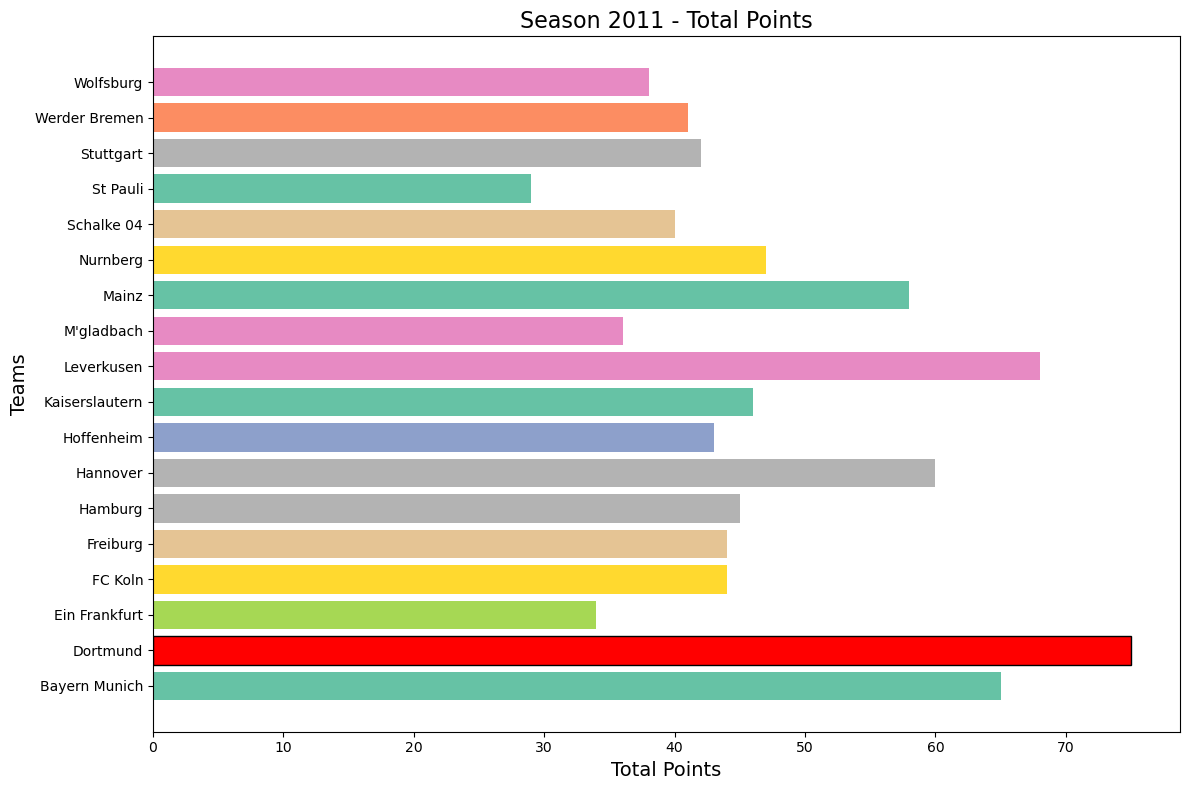

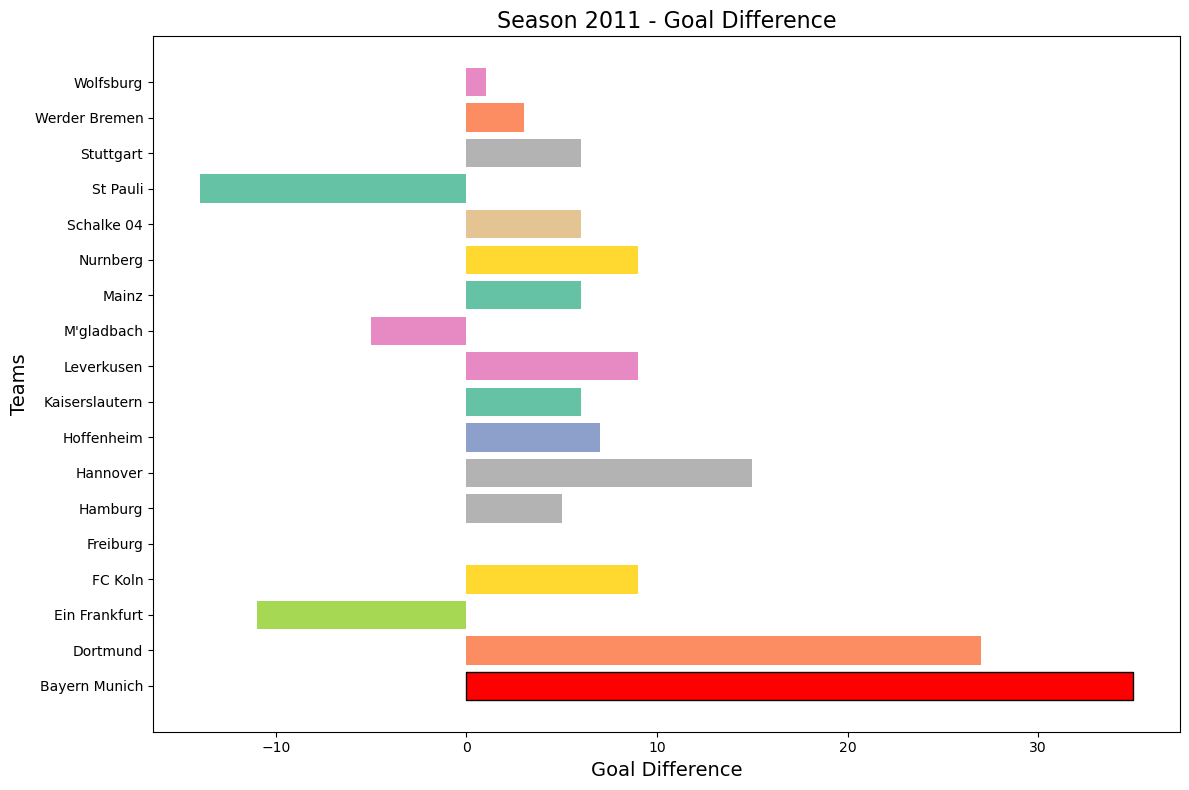

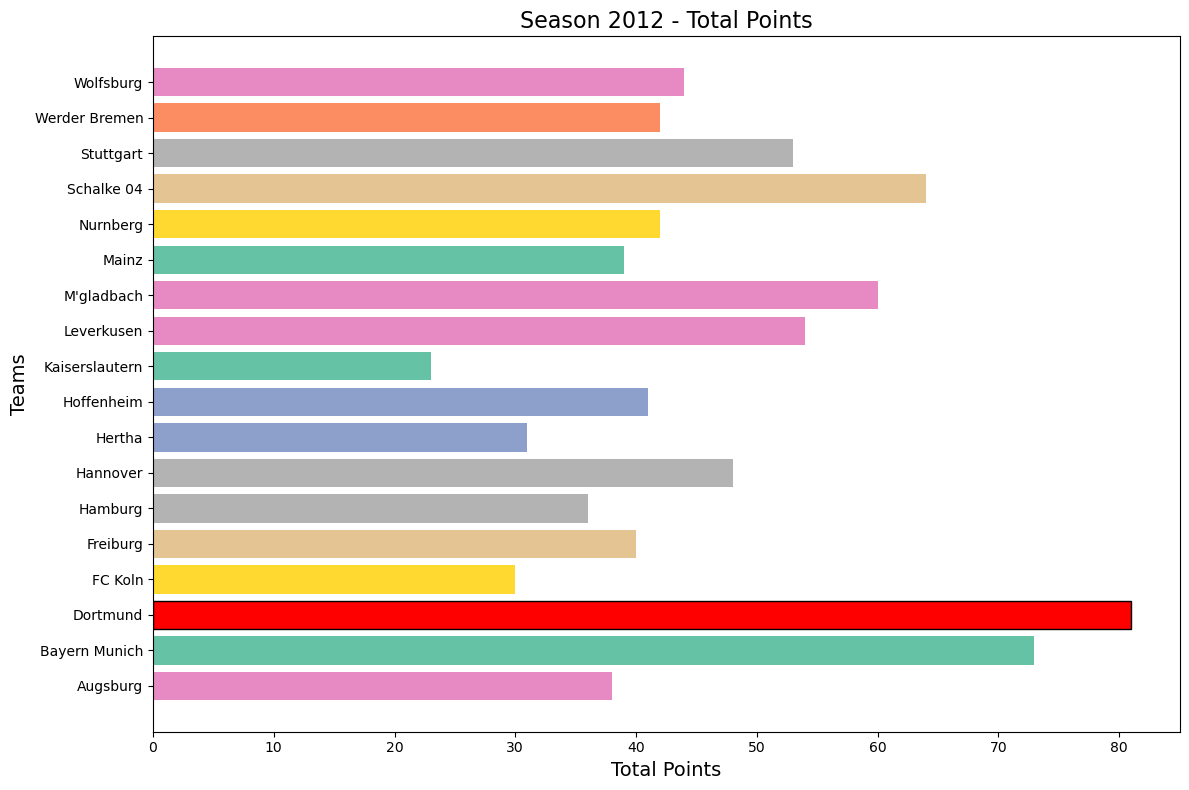

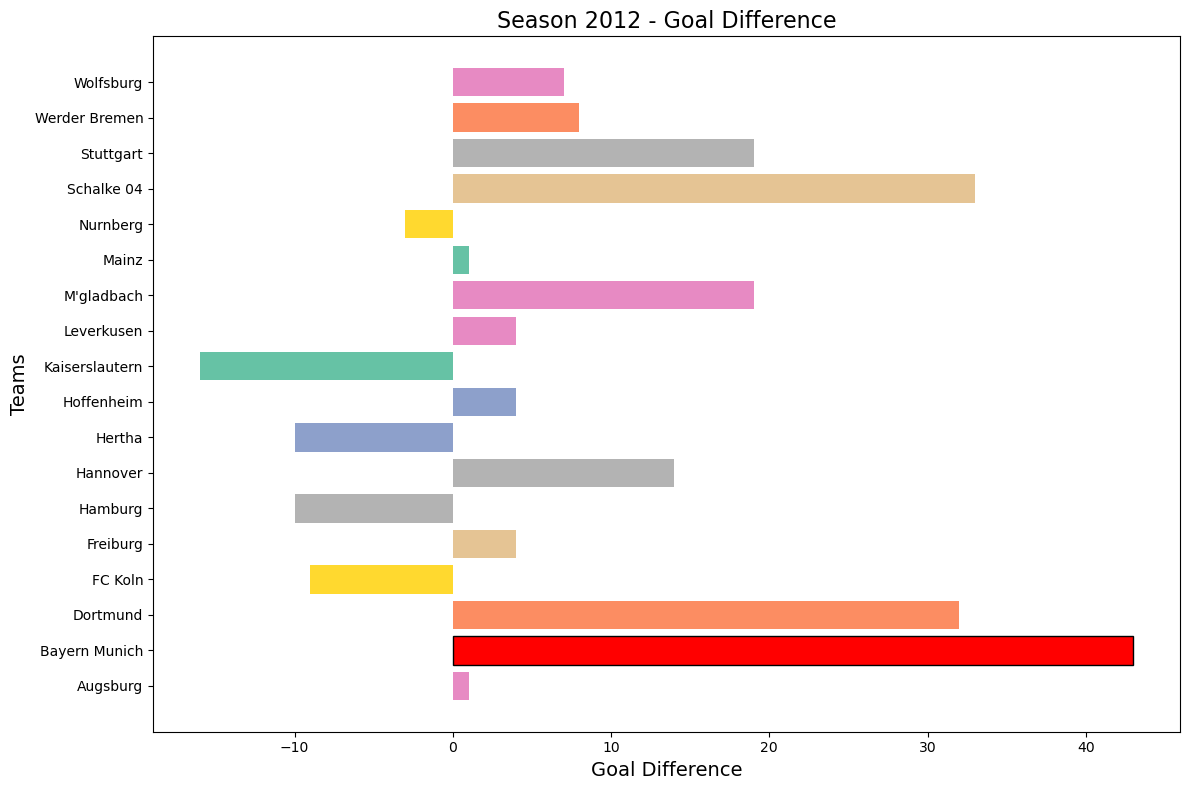

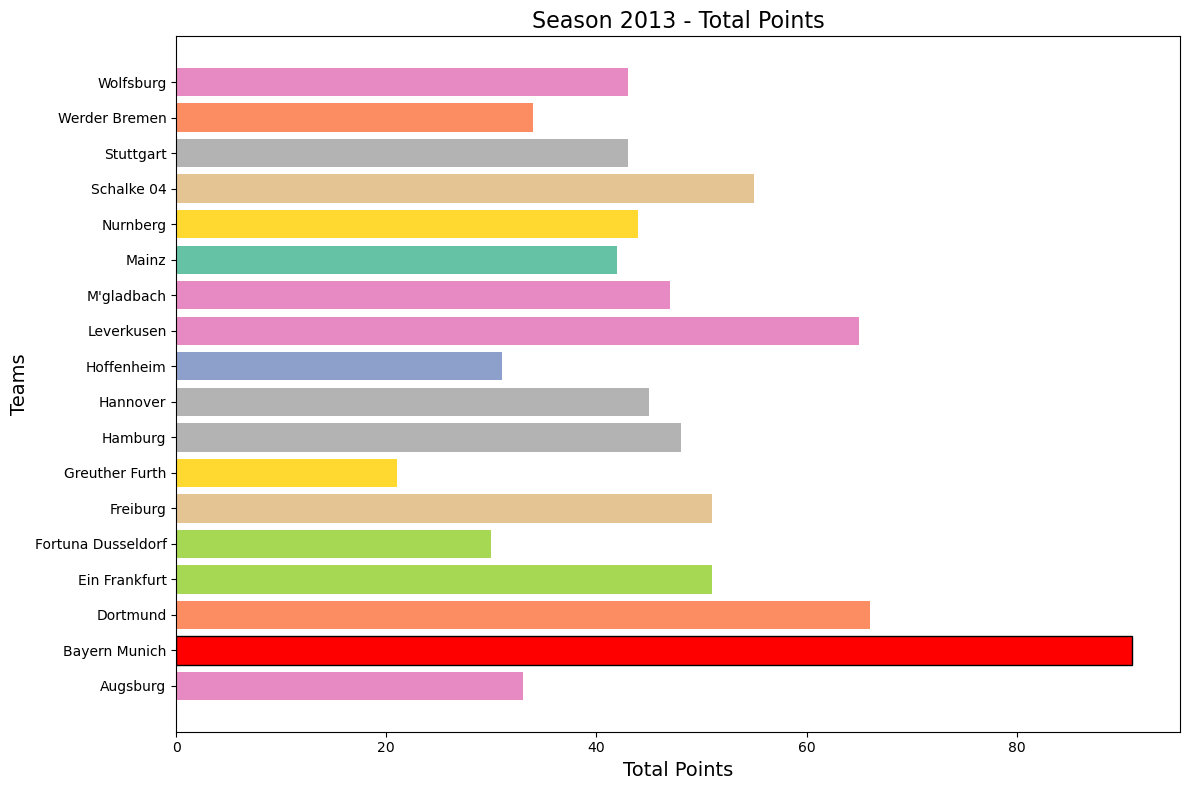

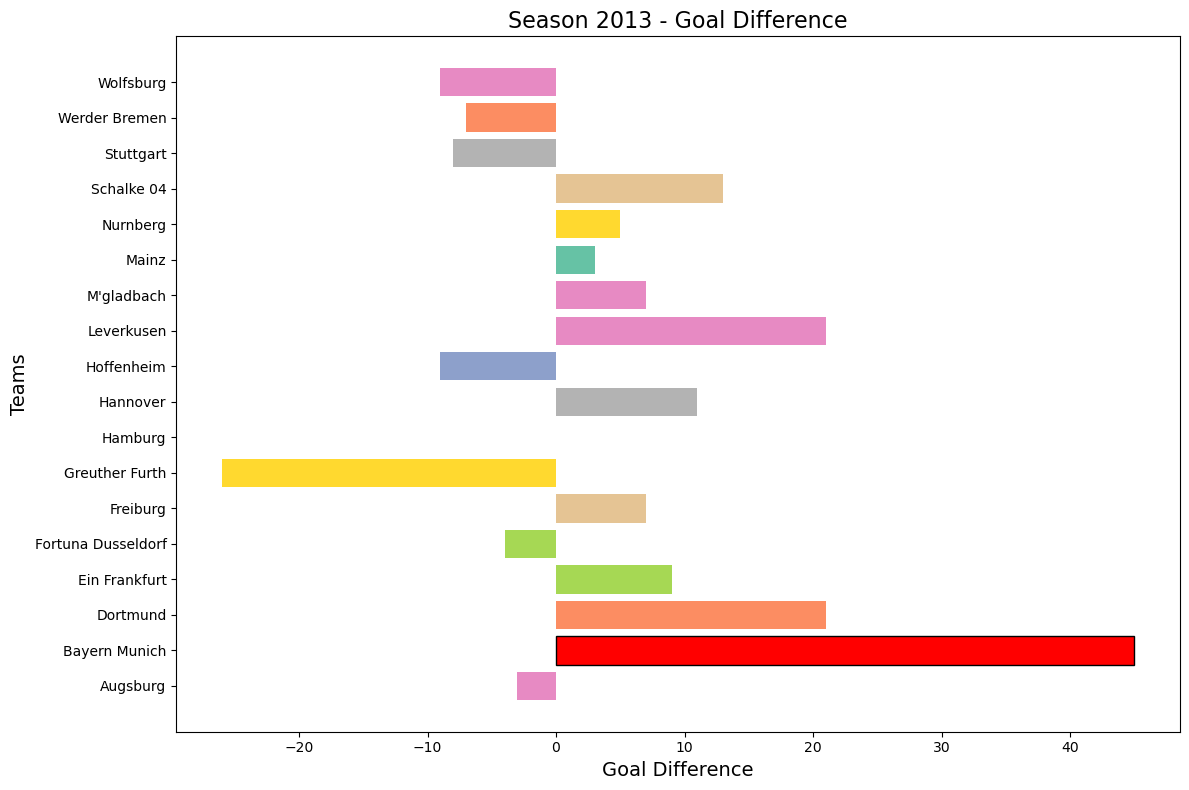

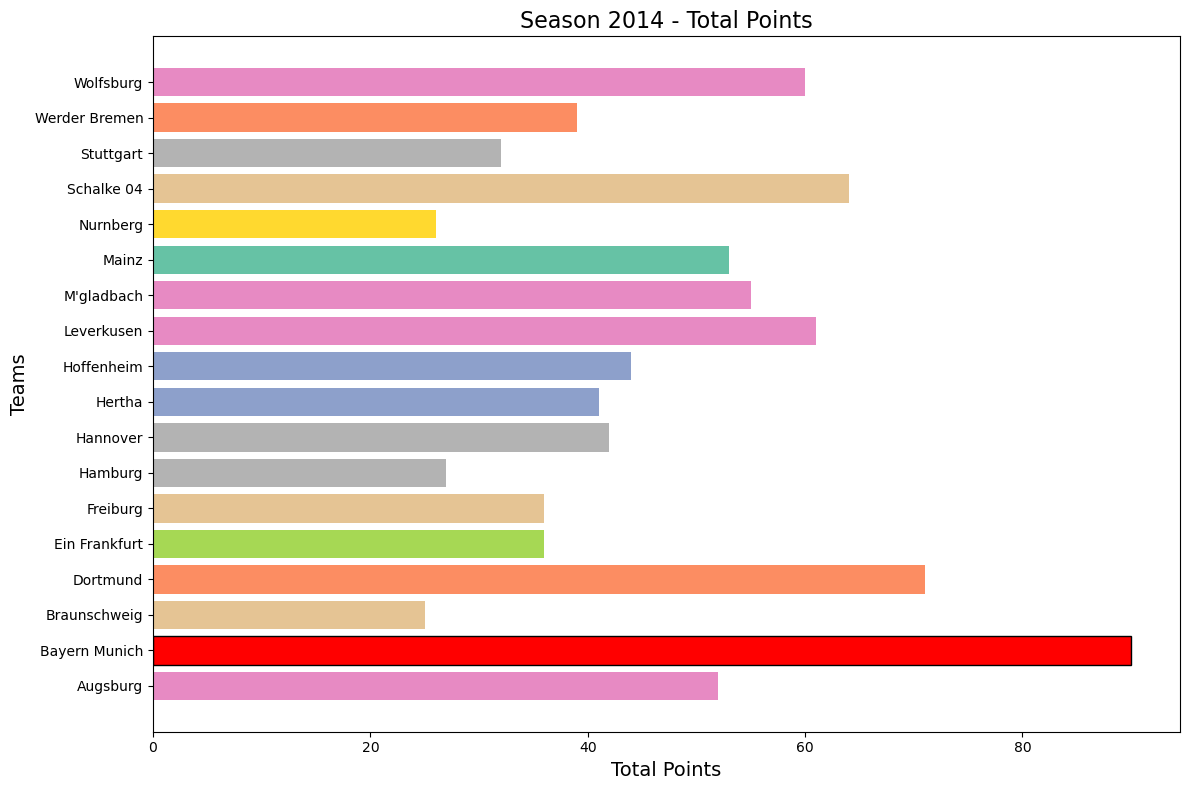

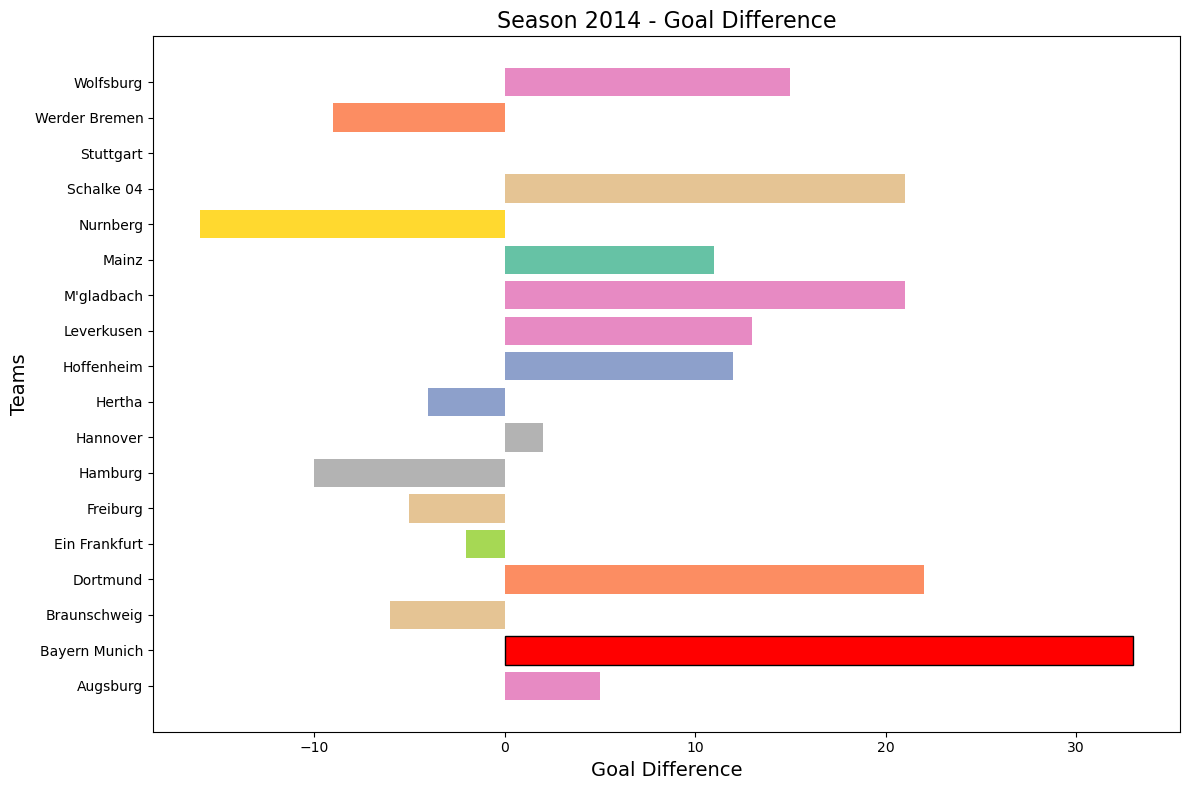

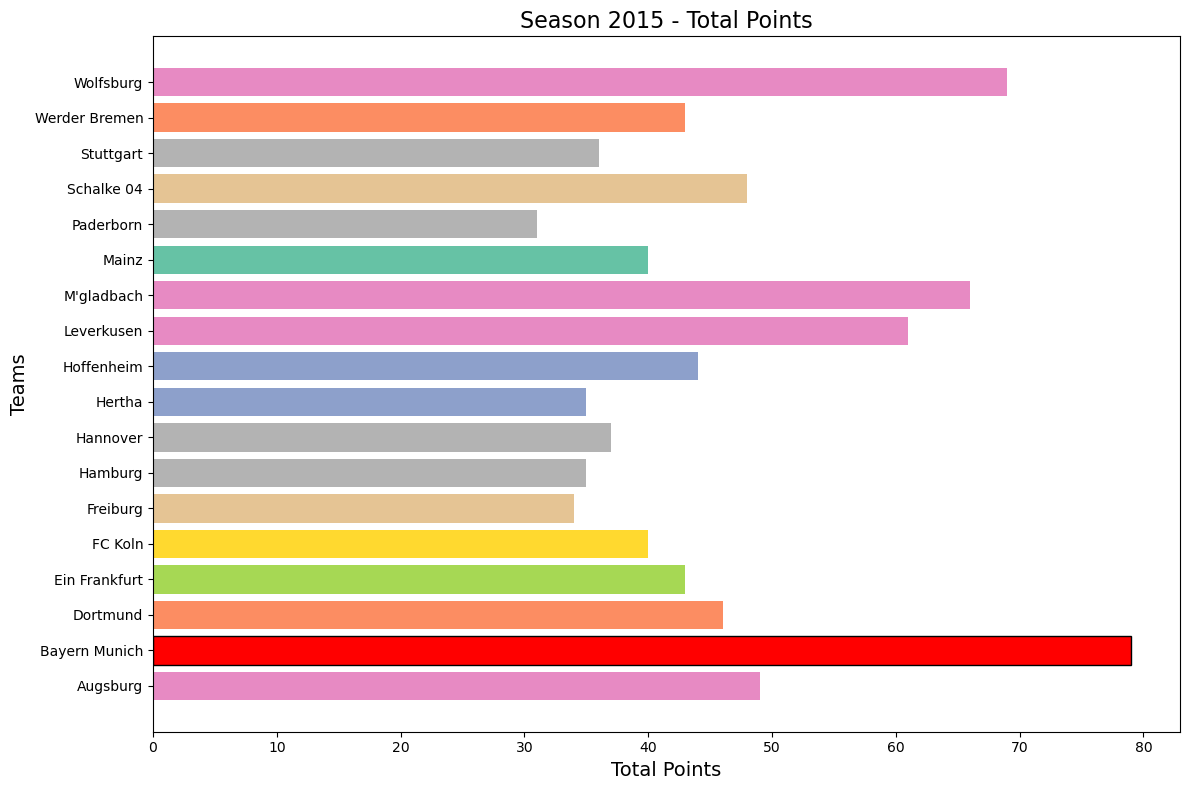

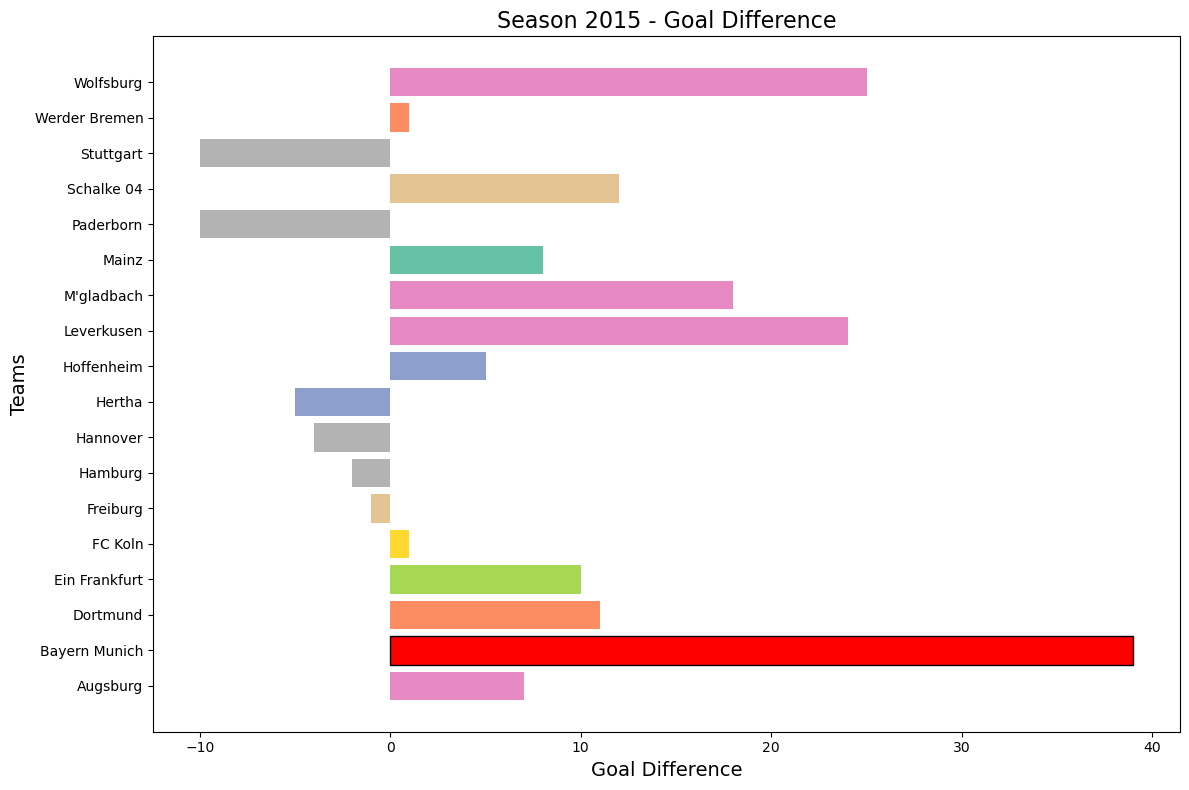

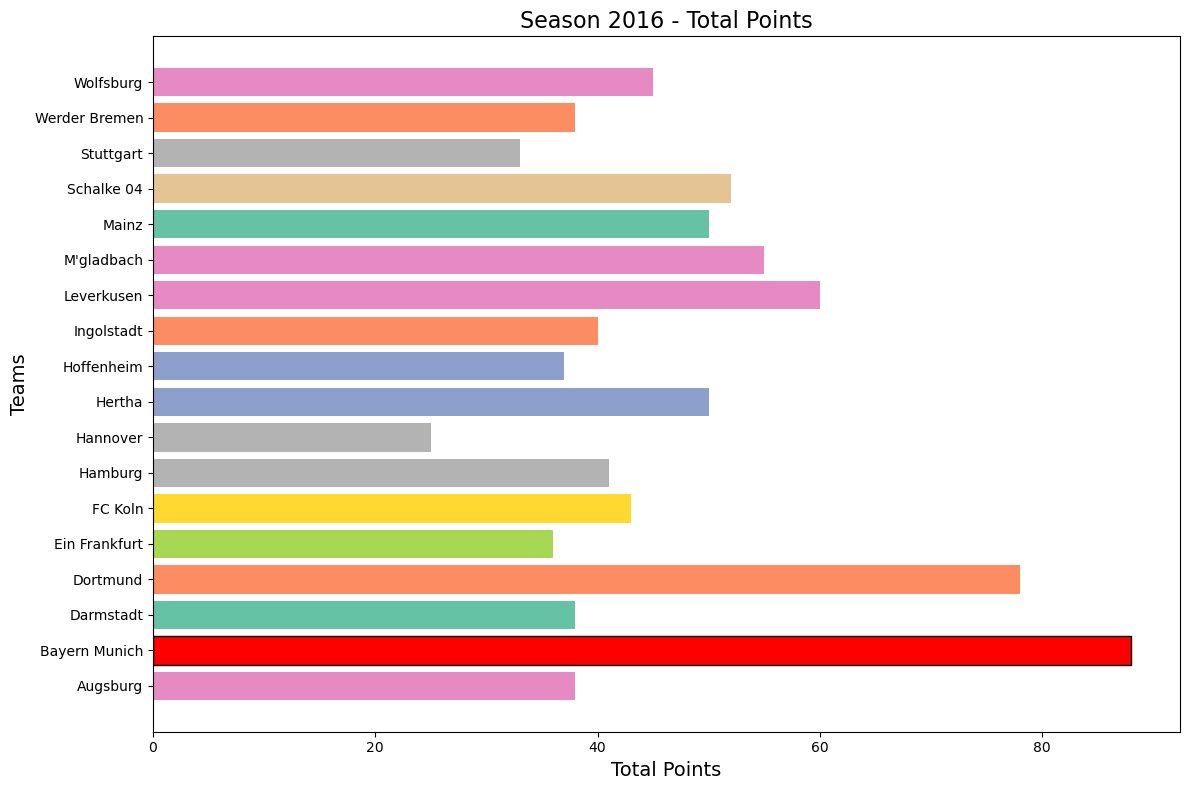

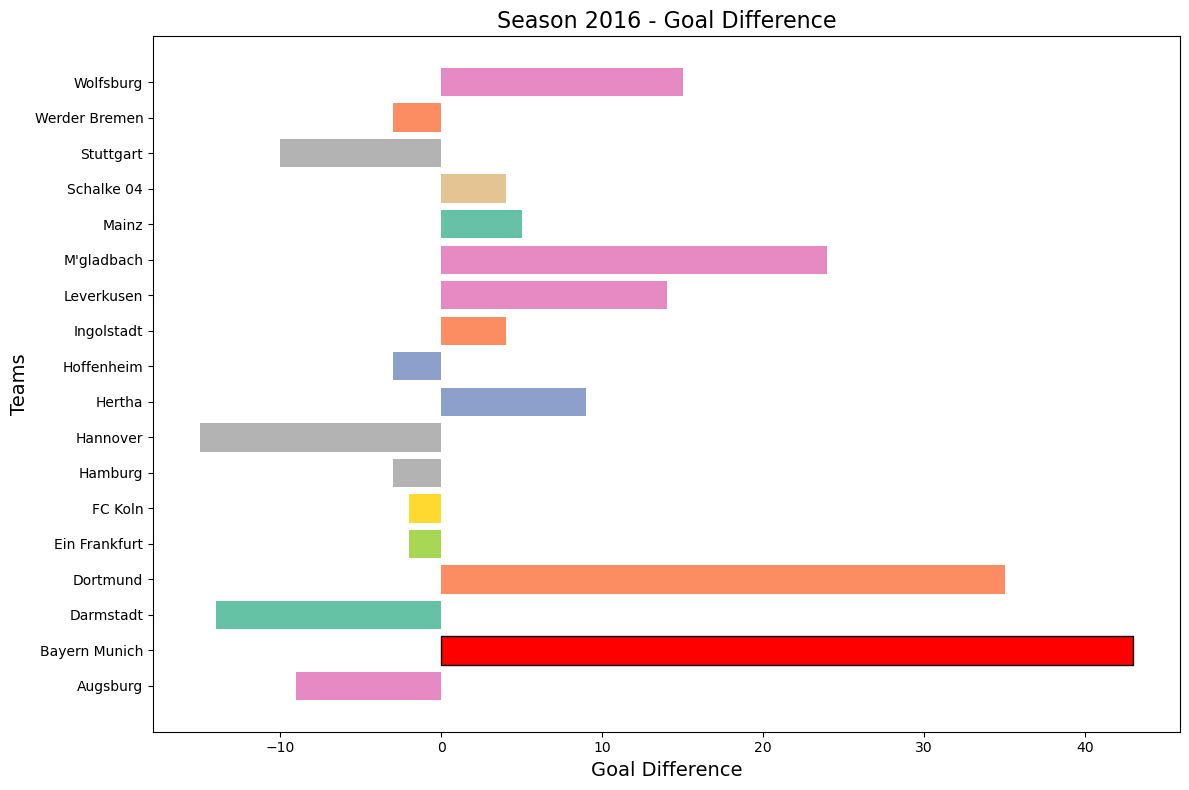

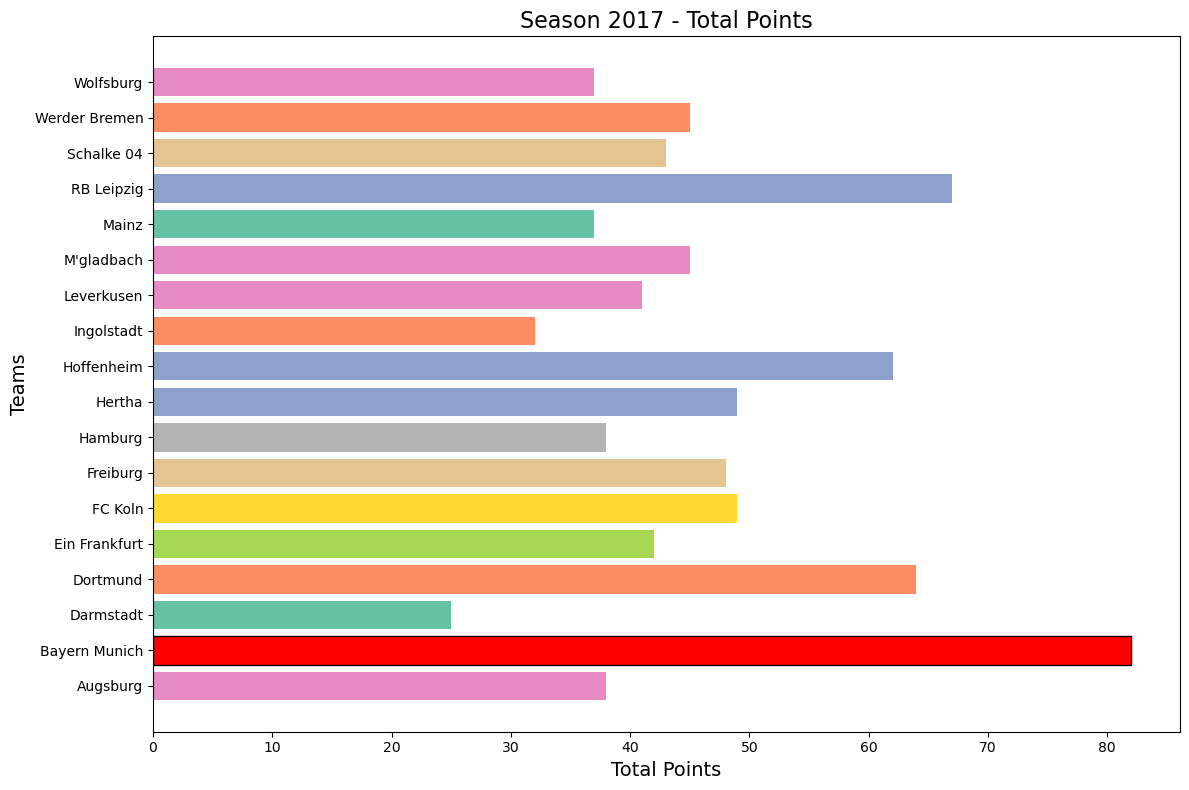

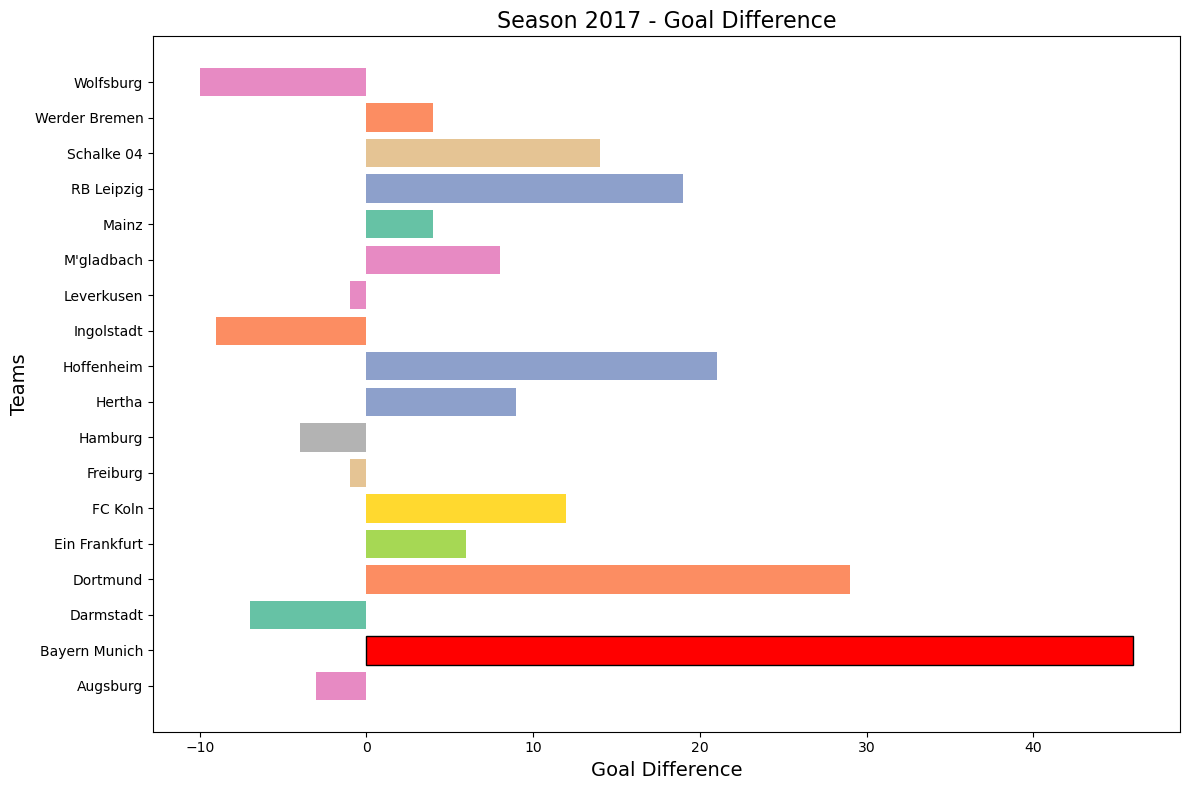

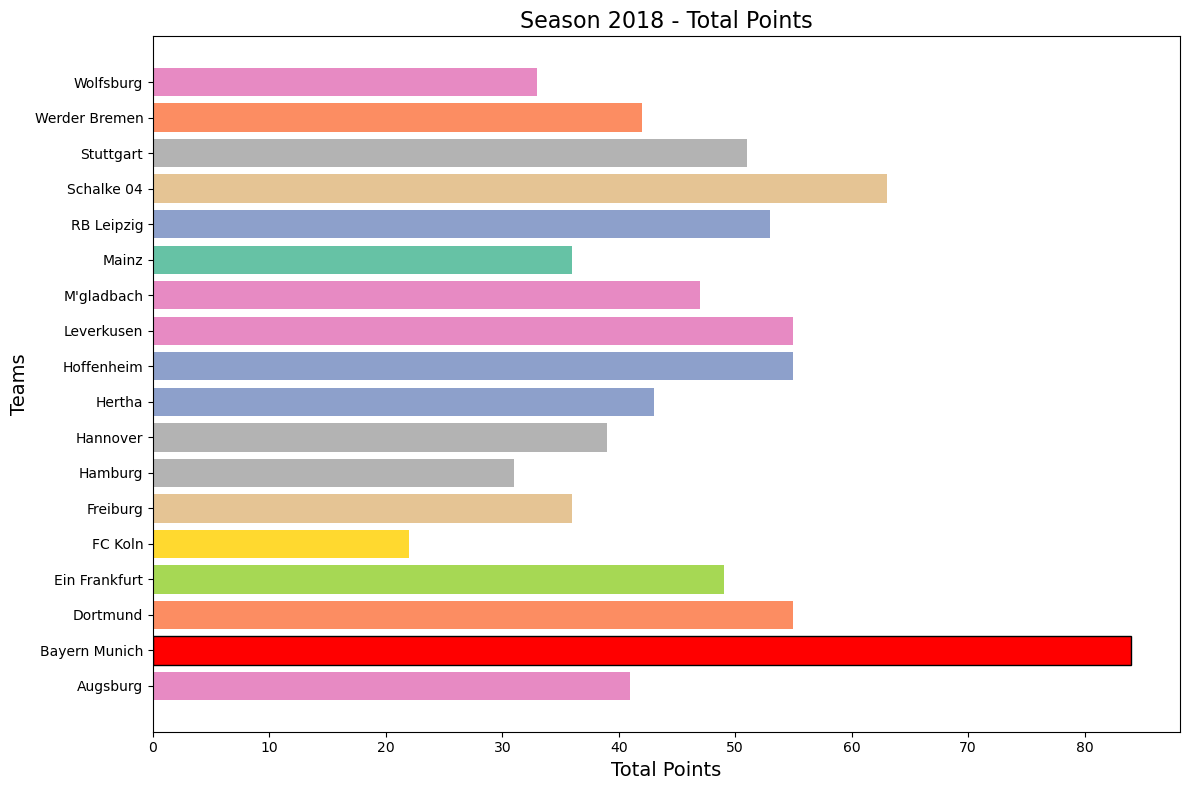

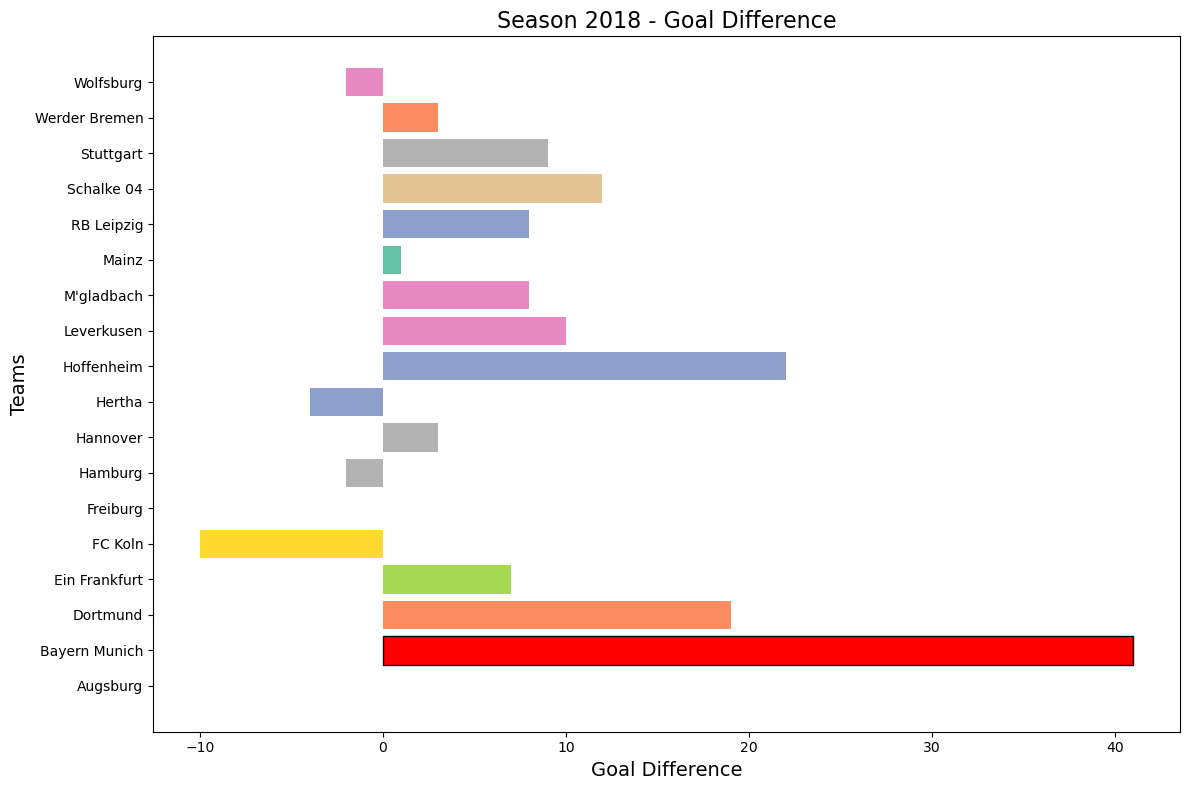

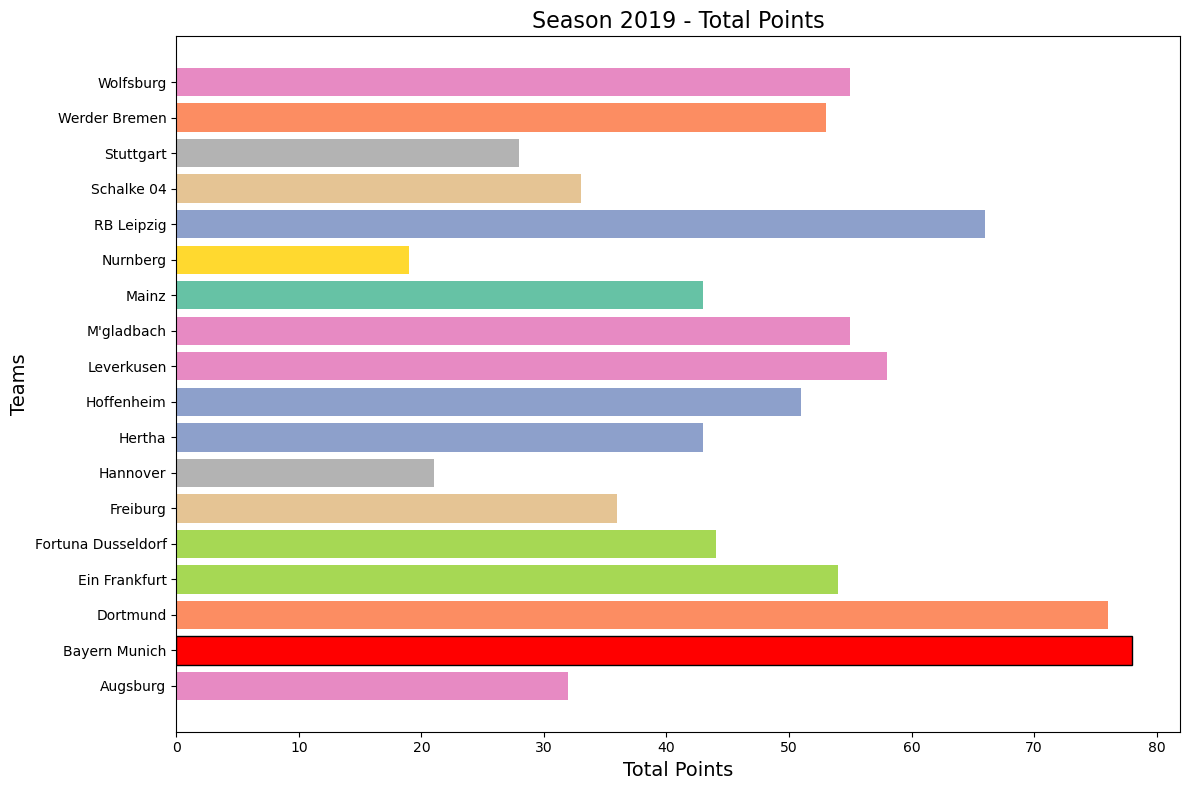

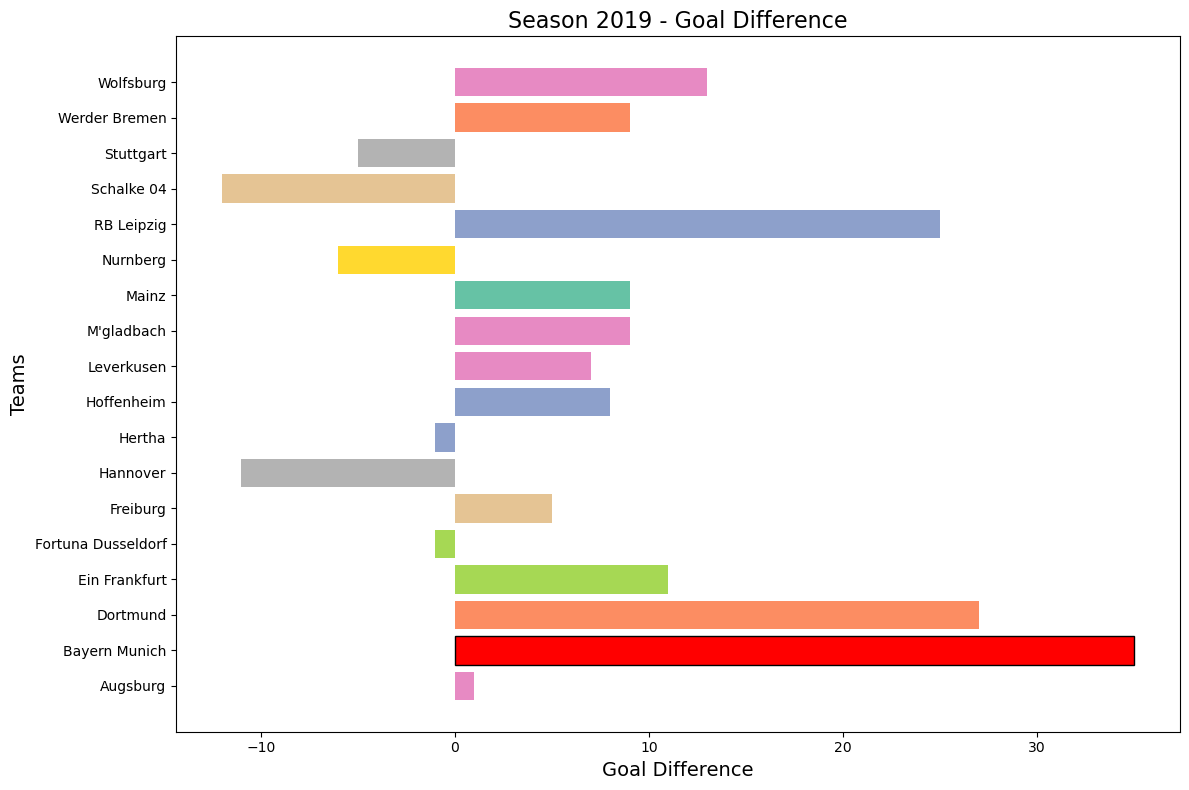

In [32]:
season_points = bundesliga_df.groupby(['SEASON', 'HOMETEAM'])['HOME_POINTS'].sum() + bundesliga_df.groupby(['SEASON', 'AWAYTEAM'])['AWAY_POINTS'].sum()
season_points_df = season_points.reset_index(name='Total_Points')


bundesliga_df['Goal_Difference'] = bundesliga_df['FTHG'] - bundesliga_df['FTAG']

season_goal_diff = bundesliga_df.groupby(['SEASON', 'HOMETEAM'])['Goal_Difference'].sum().reset_index(name='Goal_Difference')

season_points_df = pd.merge(season_points_df, season_goal_diff, on=['SEASON', 'HOMETEAM'], how='left')

teams = season_points_df['HOMETEAM'].unique()
team_colors = {team: sns.color_palette("Set2")[i % len(sns.color_palette("Set2"))] for i, team in enumerate(teams)}

for season in season_points_df['SEASON'].unique():
    season_data = season_points_df[season_points_df['SEASON'] == season]
    
    winner_team_points = season_data.loc[season_data['Total_Points'].idxmax()]
    winner_team_goal_diff = season_data.loc[season_data['Goal_Difference'].idxmax()]

    plt.figure(figsize=(12, 8))
    plt.barh(season_data['HOMETEAM'], season_data['Total_Points'], color=[team_colors[team] for team in season_data['HOMETEAM']])
    plt.barh(winner_team_points['HOMETEAM'], winner_team_points['Total_Points'], color='red', edgecolor='black')
    plt.title(f'Season {season} - Total Points', fontsize=16)
    plt.xlabel('Total Points', fontsize=14)
    plt.ylabel('Teams', fontsize=14)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.barh(season_data['HOMETEAM'], season_data['Goal_Difference'], color=[team_colors[team] for team in season_data['HOMETEAM']])
    plt.barh(winner_team_goal_diff['HOMETEAM'], winner_team_goal_diff['Goal_Difference'], color='red', edgecolor='black')  # Highlight winner for goal difference
    plt.title(f'Season {season} - Goal Difference', fontsize=16)
    plt.xlabel('Goal Difference', fontsize=14)
    plt.ylabel('Teams', fontsize=14)
    plt.tight_layout()
    plt.show()

## Part 6

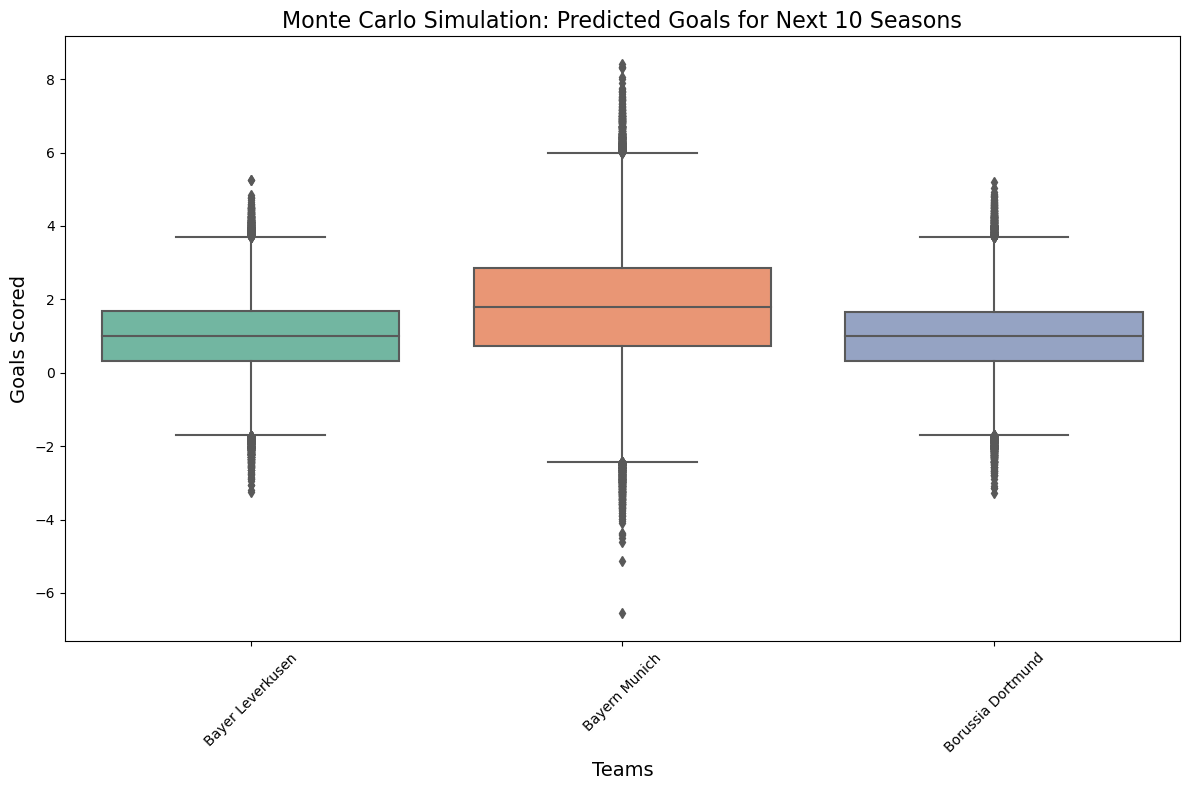

In [39]:
teams = ['Bayern Munich', 'Bayer Leverkusen', 'Borussia Dortmund']
team_data = bundesliga_df[bundesliga_df['HOMETEAM'].isin(teams) | bundesliga_df['AWAYTEAM'].isin(teams)]

team_goals = {}

for team in teams:
    team_matches = team_data[(team_data['HOMETEAM'] == team) | (team_data['AWAYTEAM'] == team)]
    
    if not team_matches.empty:
        team_goals[team] = {
            'mean': team_matches['FTHG'].mean(),
            'std': team_matches['FTHG'].std() if team_matches['FTHG'].std() > 0 else 1
        }
    else:
        team_goals[team] = {
            'mean': 1,
            'std': 1
        }

n_simulations = 10000
n_seasons = 10

simulation_results = {team: [] for team in teams}

for team in teams:
    mean_goals = team_goals[team]['mean']
    std_goals = team_goals[team]['std']
    
    for _ in range(n_simulations):
        simulated_goals = np.random.normal(loc=mean_goals, scale=std_goals, size=n_seasons)
        simulation_results[team].append(simulated_goals)

flattened_results = {
    team: np.array(simulation_results[team]).flatten() 
    for team in teams
}

simulation_df = pd.DataFrame(flattened_results)

simulation_long_df = simulation_df.melt(var_name='Team', value_name='Goals')

simulation_long_df['Goals'] = pd.to_numeric(simulation_long_df['Goals'], errors='coerce')
simulation_long_df['Team'] = simulation_long_df['Team'].astype('category')

plt.figure(figsize=(12, 8))
sns.boxplot(data=simulation_long_df, x='Team', y='Goals', palette='Set2')
plt.title('Monte Carlo Simulation: Predicted Goals for Next 10 Seasons', fontsize=16)
plt.xlabel('Teams', fontsize=14)
plt.ylabel('Goals Scored', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
